# Task 2: Decision Trees for Human Activity Recognition 

## 1.Creating Decision Tree using SkLearn

### Decision Tree 1: Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

#### Importing libraries

In [61]:
import sklearn as skl
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train,X_test,y_train,y_test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
activities=["Walking","Walking Upstairs","Walking Downstairs","Sitting","Standing","Laying"]


#### Normalization

In [62]:
X_train_f=X_train.reshape(-1,3)
X_test_f=X_test.reshape(-1,3)

In [63]:
scaler=StandardScaler()
X_train_f_n=scaler.fit_transform(X_train_f)
X_test_f_n=scaler.transform(X_test_f)
X_train_n_3d=X_train_f_n.reshape(126,500,3)
X_train_f_n_rs=X_train_n_3d.reshape(126,1500)
X_test_n_3d=X_test_f_n.reshape(54,500,3)
X_test_f_n_rs=X_test_n_3d.reshape(54,1500)


In [64]:
x=X_train_f_n_rs
y=y_train
xt=X_test_f_n_rs

#### Using Gini

##### Making Decision Tree

In [65]:
sk_dt_g1=tree.DecisionTreeClassifier(criterion="gini",random_state=42,class_weight='balanced')
sk_dt1_g=sk_dt_g1.fit(x,y)
depth=sk_dt1_g.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt1_g,'t2_dt1_g.pkl')

Depth of Decision Tree: 8


['t2_dt1_g.pkl']

##### Decision Tree Plot

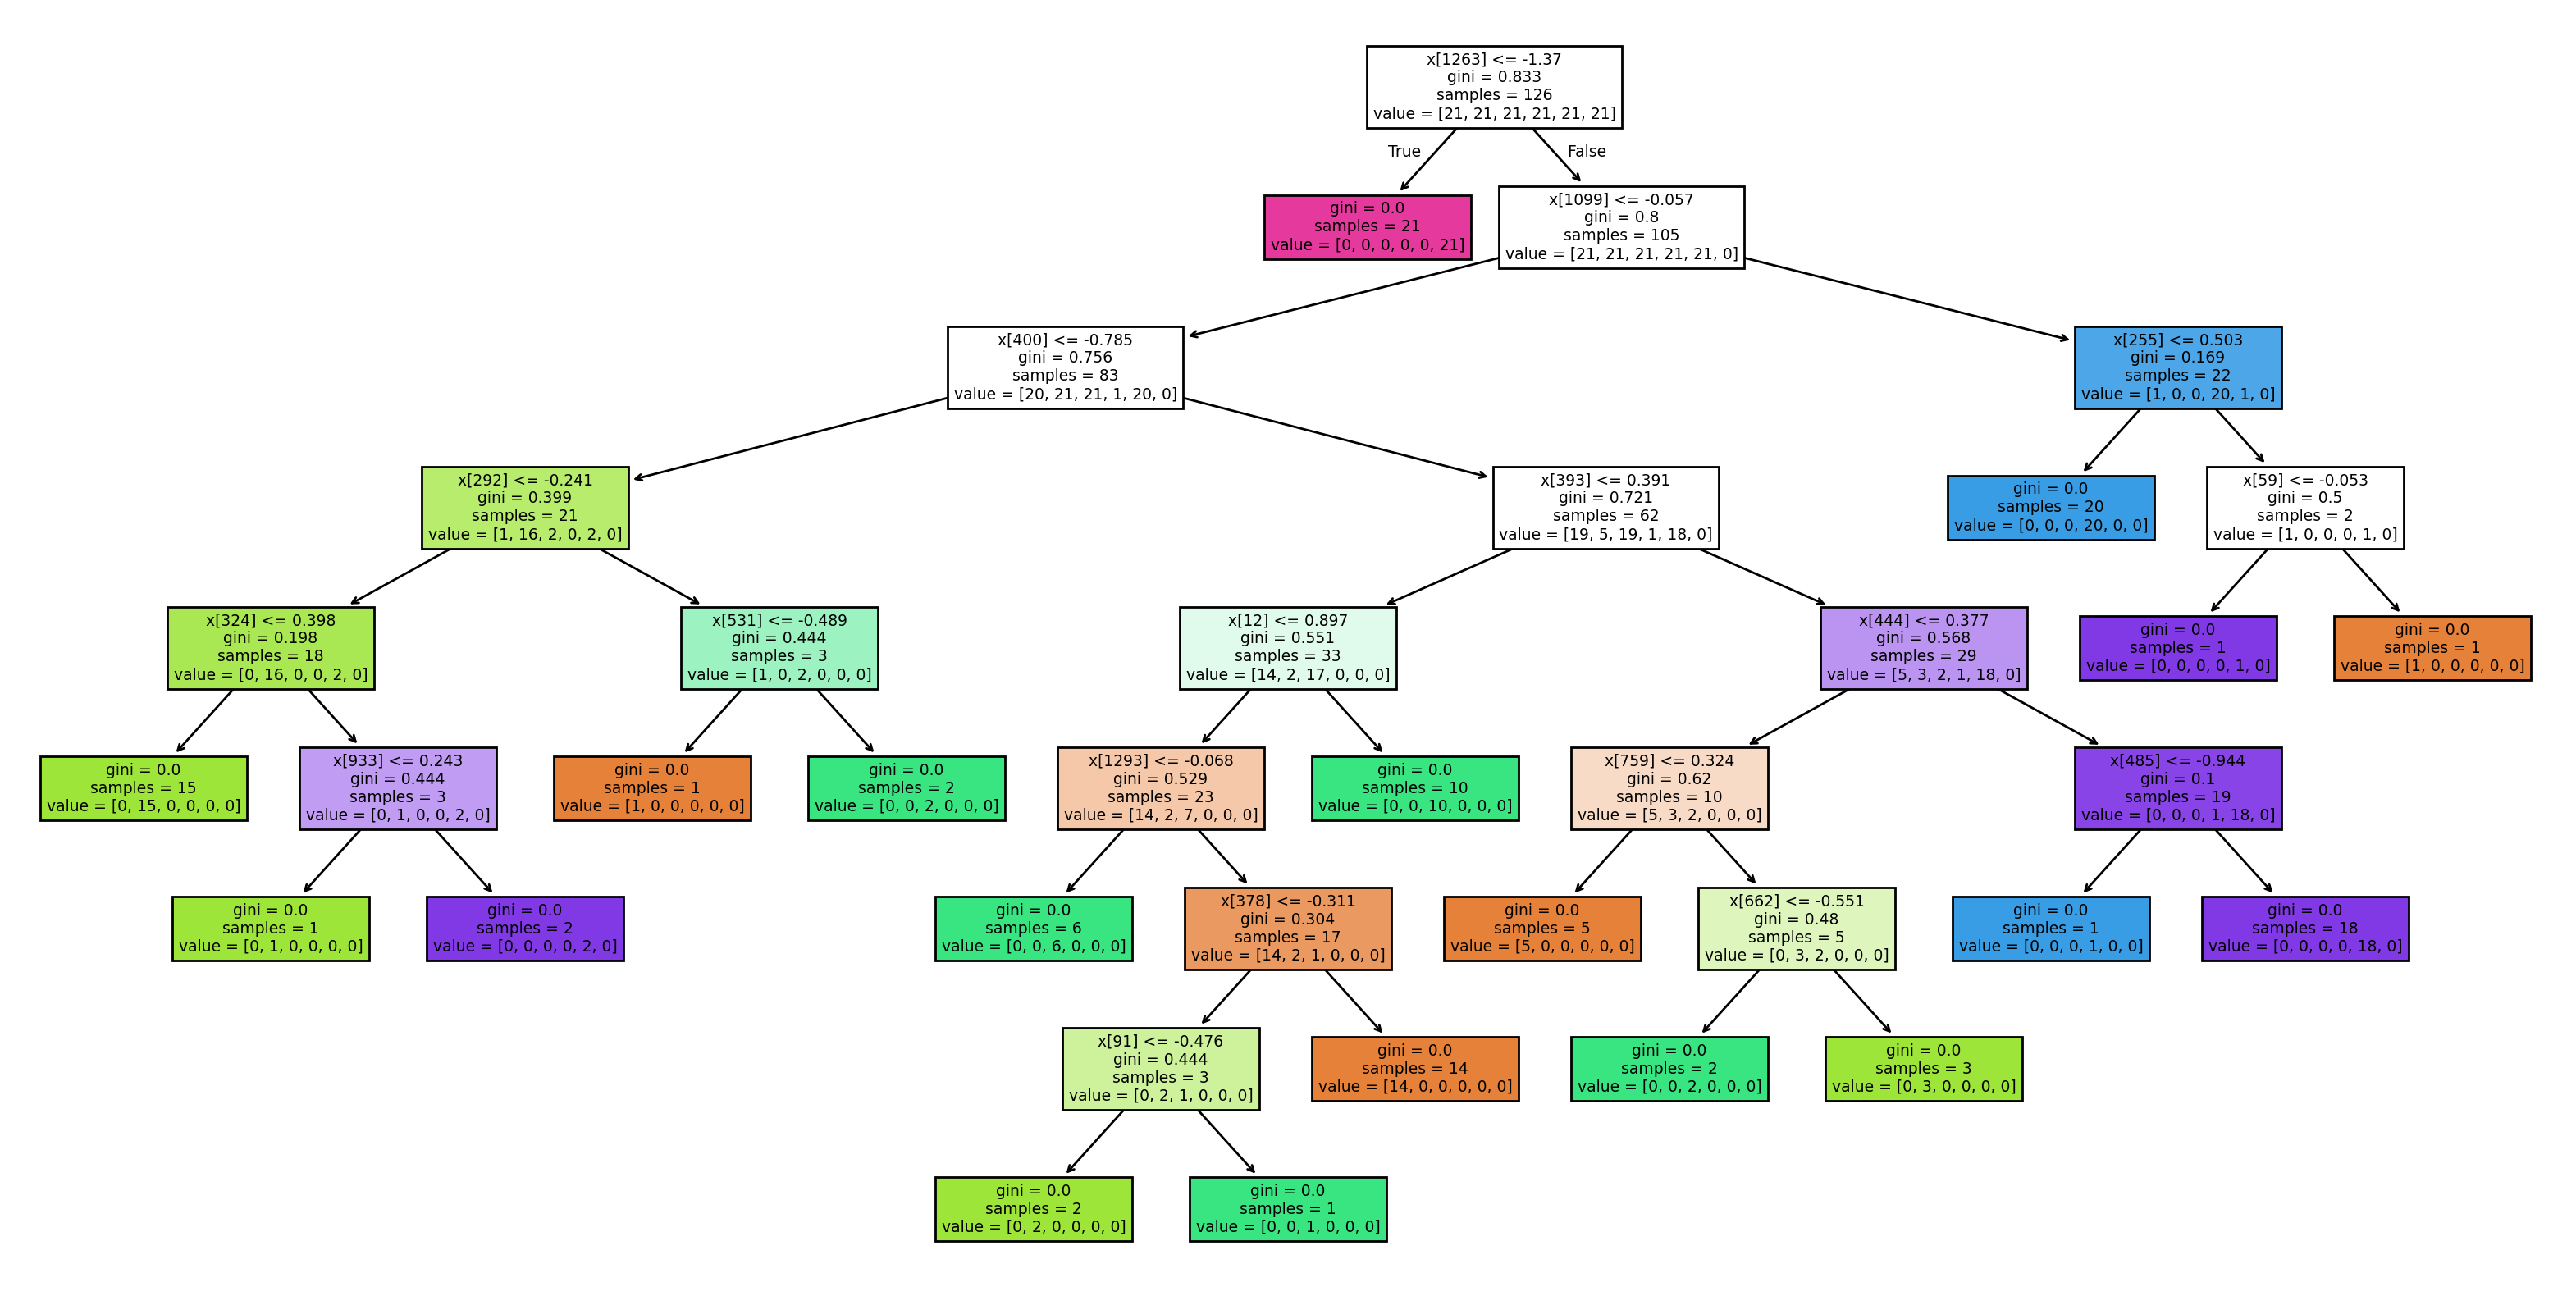

In [66]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt1_g, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  53.70370370370371%
Precision :  55.671420083184785%
Recall :  53.703703703703695%


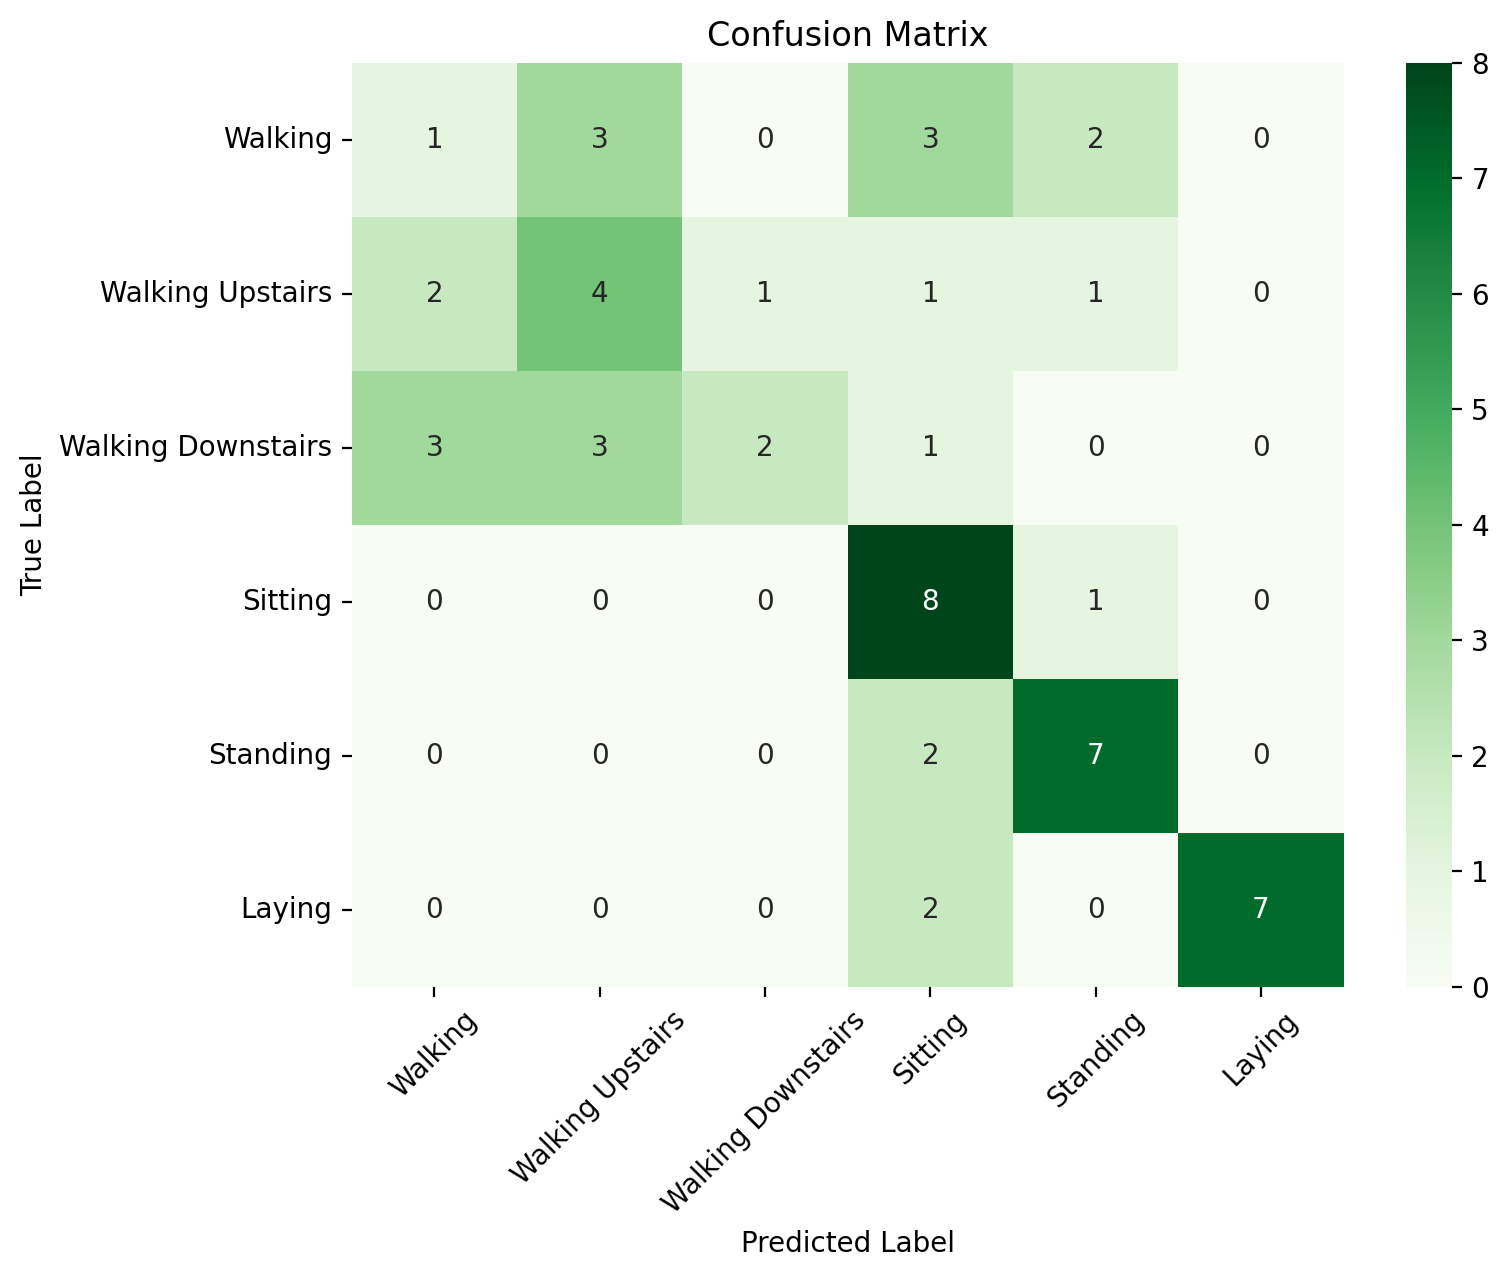

In [67]:

y_hat=sk_dt1_g.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using Entropy

##### Making Decision Tree

In [68]:
sk_dt_e1=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,class_weight='balanced')
sk_dt1_e=sk_dt_e1.fit(x,y)
depth=sk_dt1_e.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt1_e,'t2_dt1_e.pkl')

Depth of Decision Tree: 7


['t2_dt1_e.pkl']

##### Decision Tree Plot

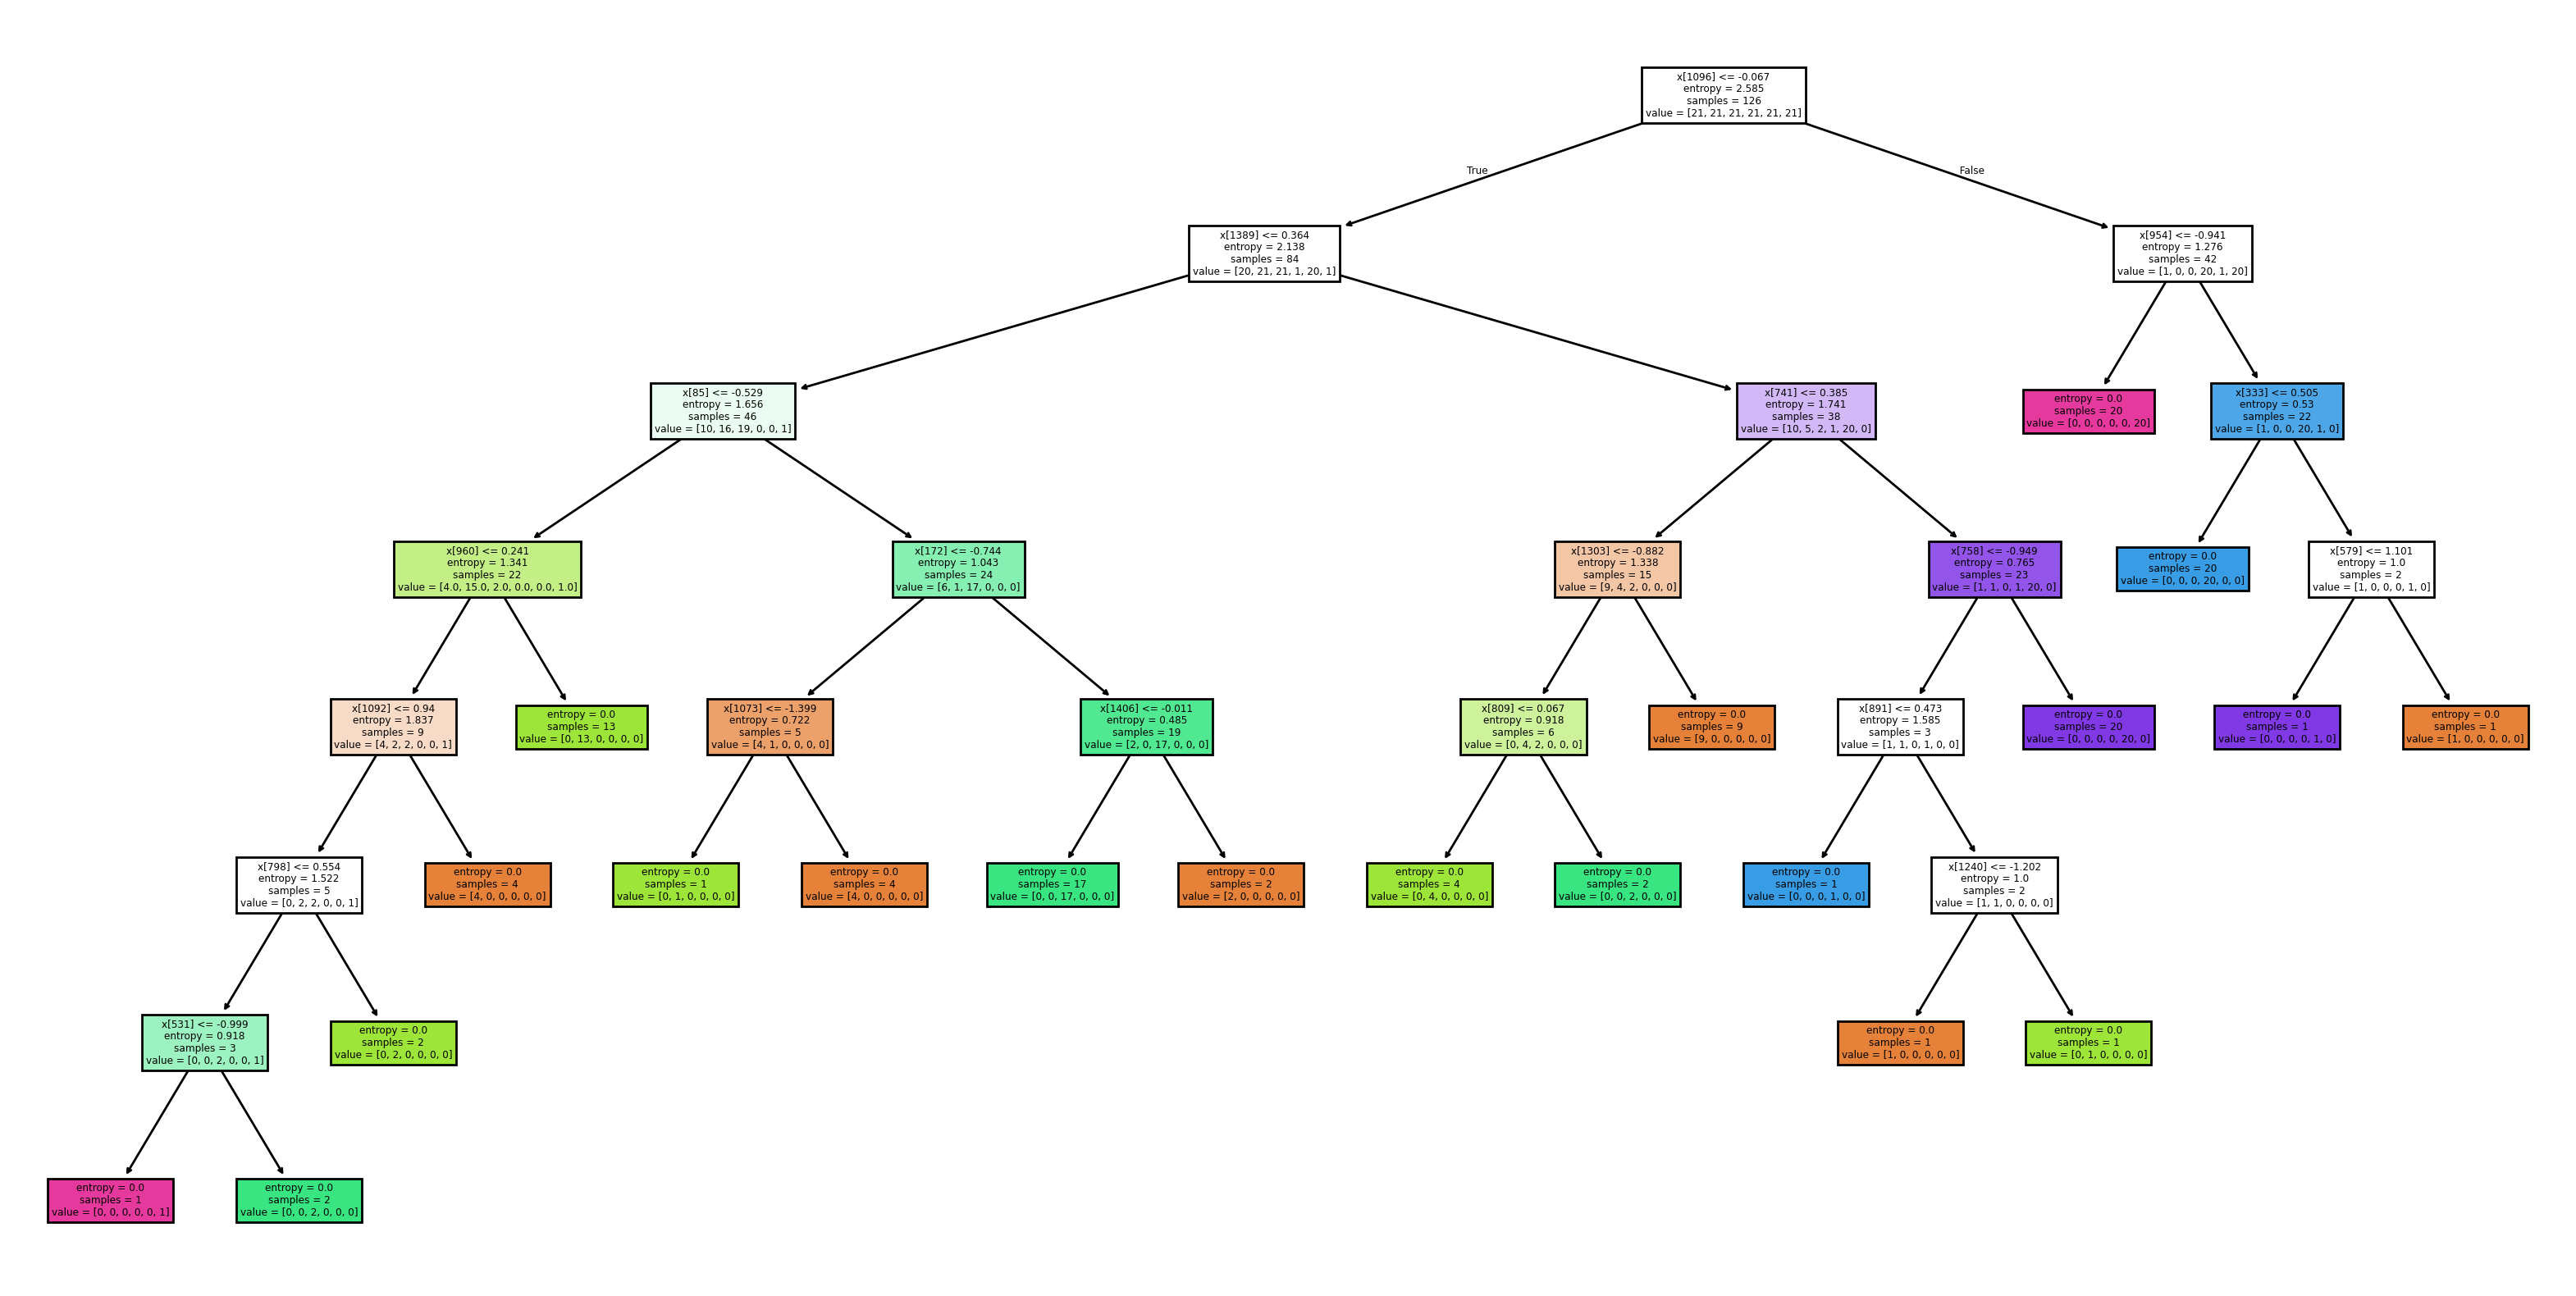

In [69]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt1_e, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  59.25925925925925%
Precision :  52.82865282865282%
Recall :  59.25925925925925%


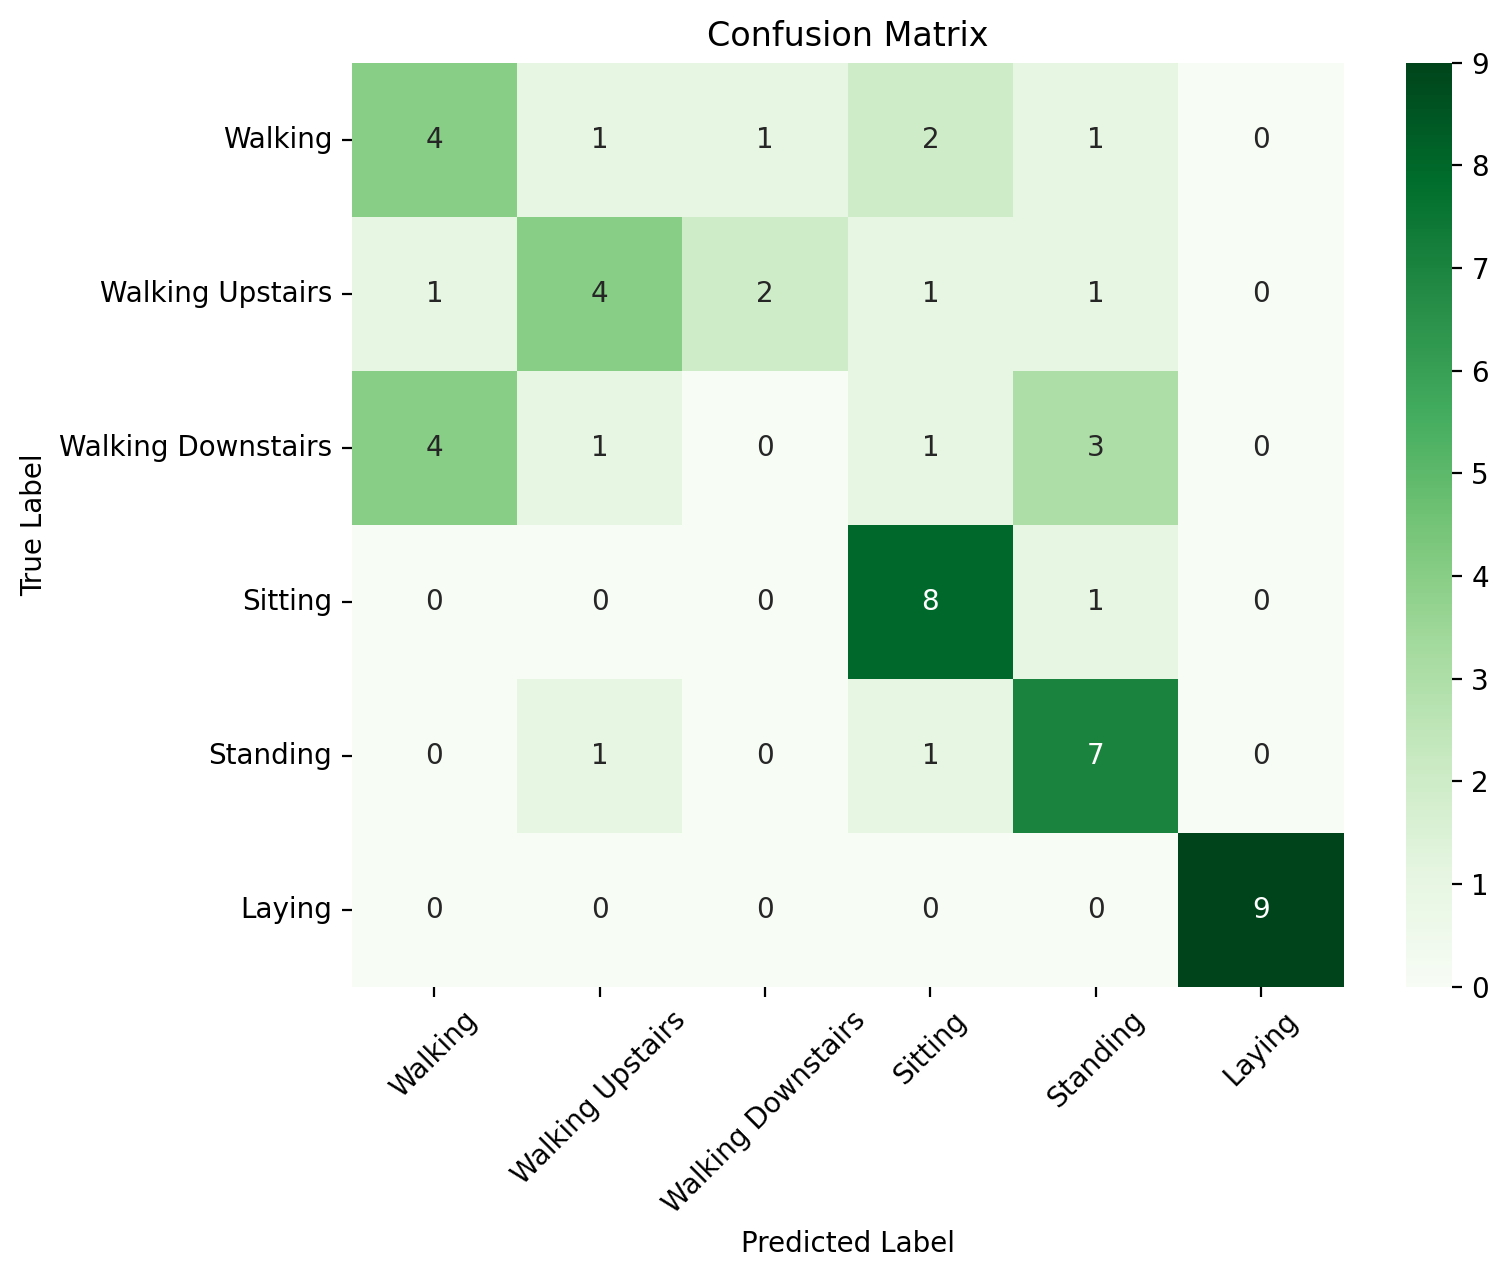

In [120]:

y_hat=sk_dt1_e.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 2: Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

#### Using PCA of features

##### Imprting data and Normalising

In [71]:
X_Train_Tsfel=pd.read_csv("X_Train_Tsfel.csv")
X_Test_Tsfel=pd.read_csv("X_Test_Tsfel.csv")

In [72]:

X_Train_Tsfel=X_Train_Tsfel.drop(columns=['class'])


In [73]:
from sklearn.preprocessing import StandardScaler
X_Train_Tsfel.columns=[None]*X_Train_Tsfel.shape[1]
X_Test_Tsfel.columns=[None]*X_Test_Tsfel.shape[1]
scalar=StandardScaler()
X_Train_pca_n=scalar.fit_transform(X_Train_Tsfel)
X_Test_pca_n=scalar.transform(X_Test_Tsfel)
x_pca=X_Train_pca_n
xt_pca=X_Test_pca_n
y_pca=y_train

##### Using Gini

Making Decision Tree

In [74]:
sk_dt_pca_g=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt_g_pca=sk_dt_pca_g.fit(x_pca,y_pca)
depth=sk_dt_g_pca.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt_g_pca,'Dt_tk3_g.pkl')

Depth of Decision Tree: 12


['Dt_tk3_g.pkl']

Decision Tree Plot

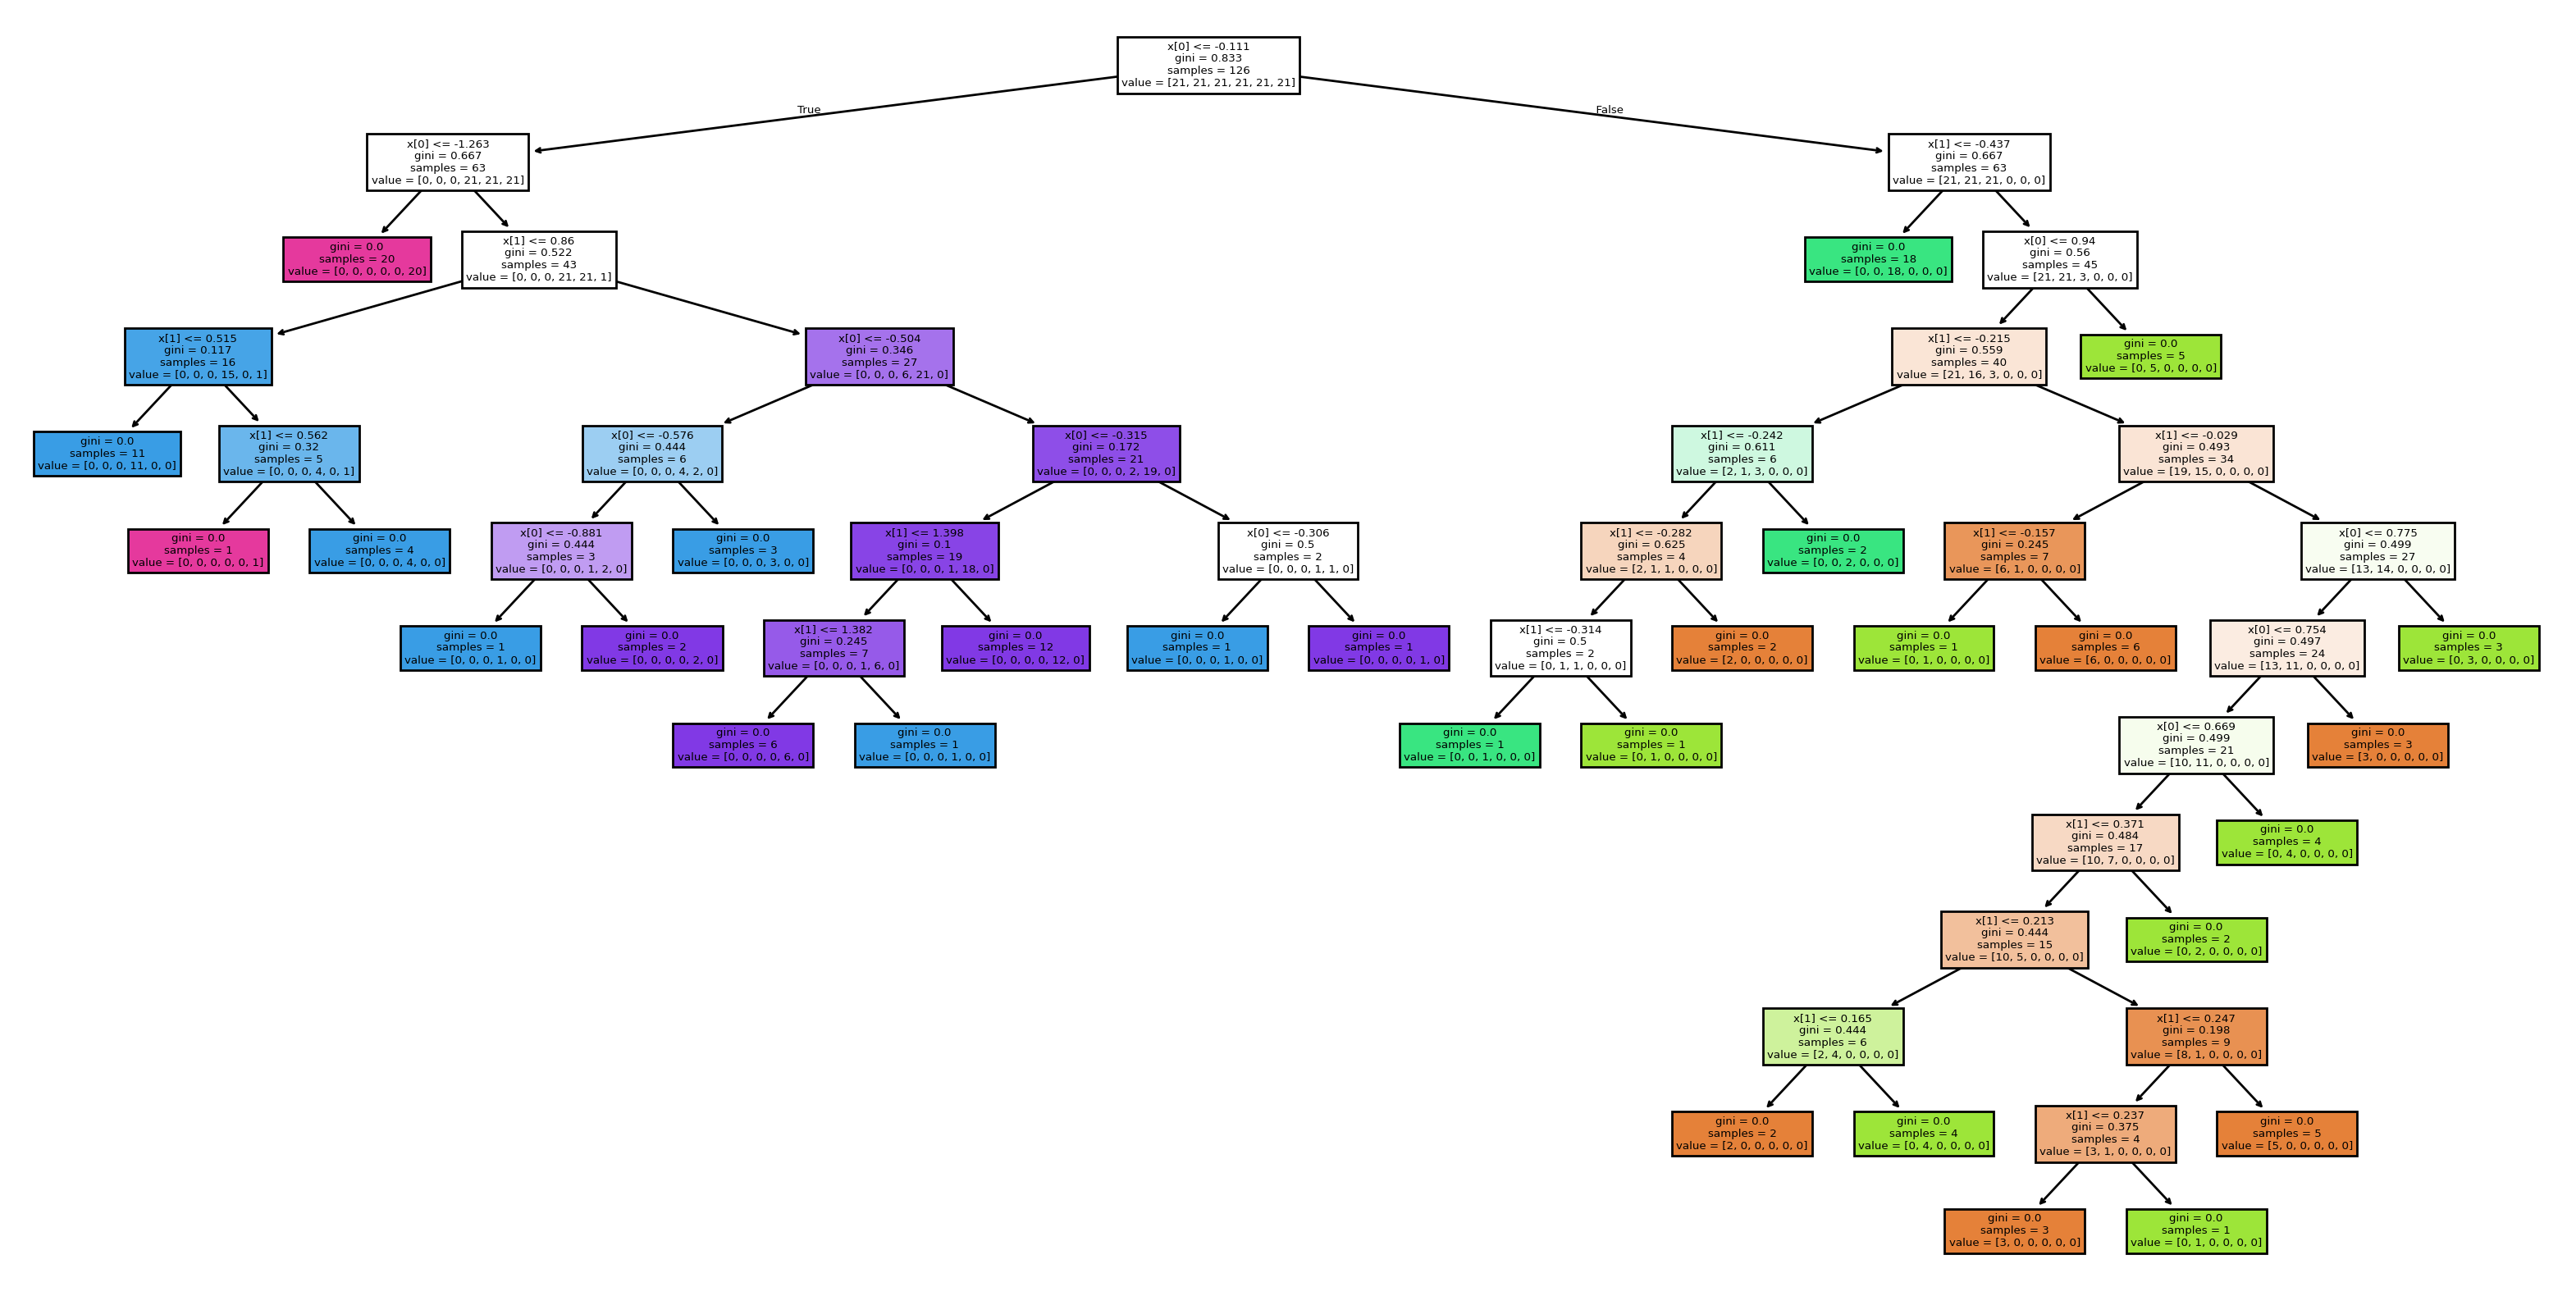

In [75]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt_g_pca, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  53.70370370370371%
Precision :  64.74358974358975%
Recall :  53.70370370370371%


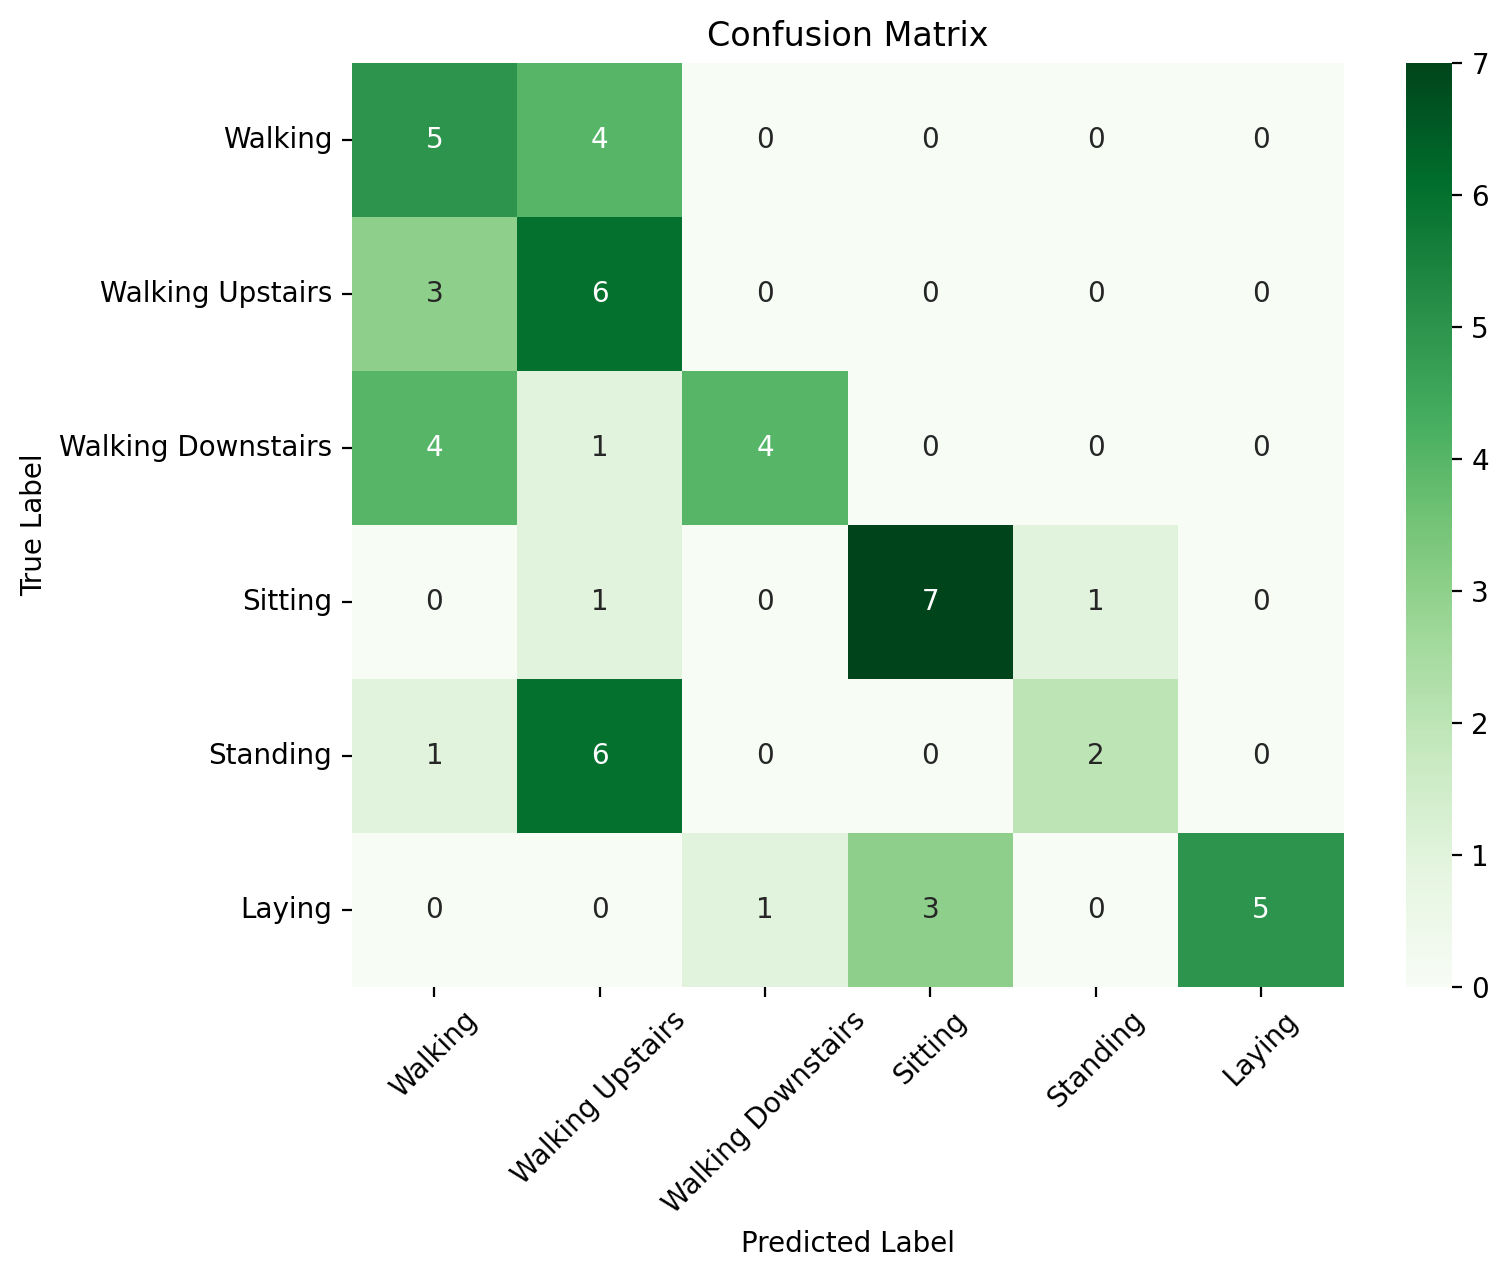

In [122]:

y_hat=sk_dt_g_pca.predict(xt_pca)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Using Entropy

Making Decision Tree

In [77]:
sk_dt_pca_e=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt_e_pca=sk_dt_pca_e.fit(x_pca,y_pca)
depth=sk_dt_e_pca.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt_e_pca,'Dt_tk3_e.pkl')

Depth of Decision Tree: 10


['Dt_tk3_e.pkl']

Decision Tree Plot

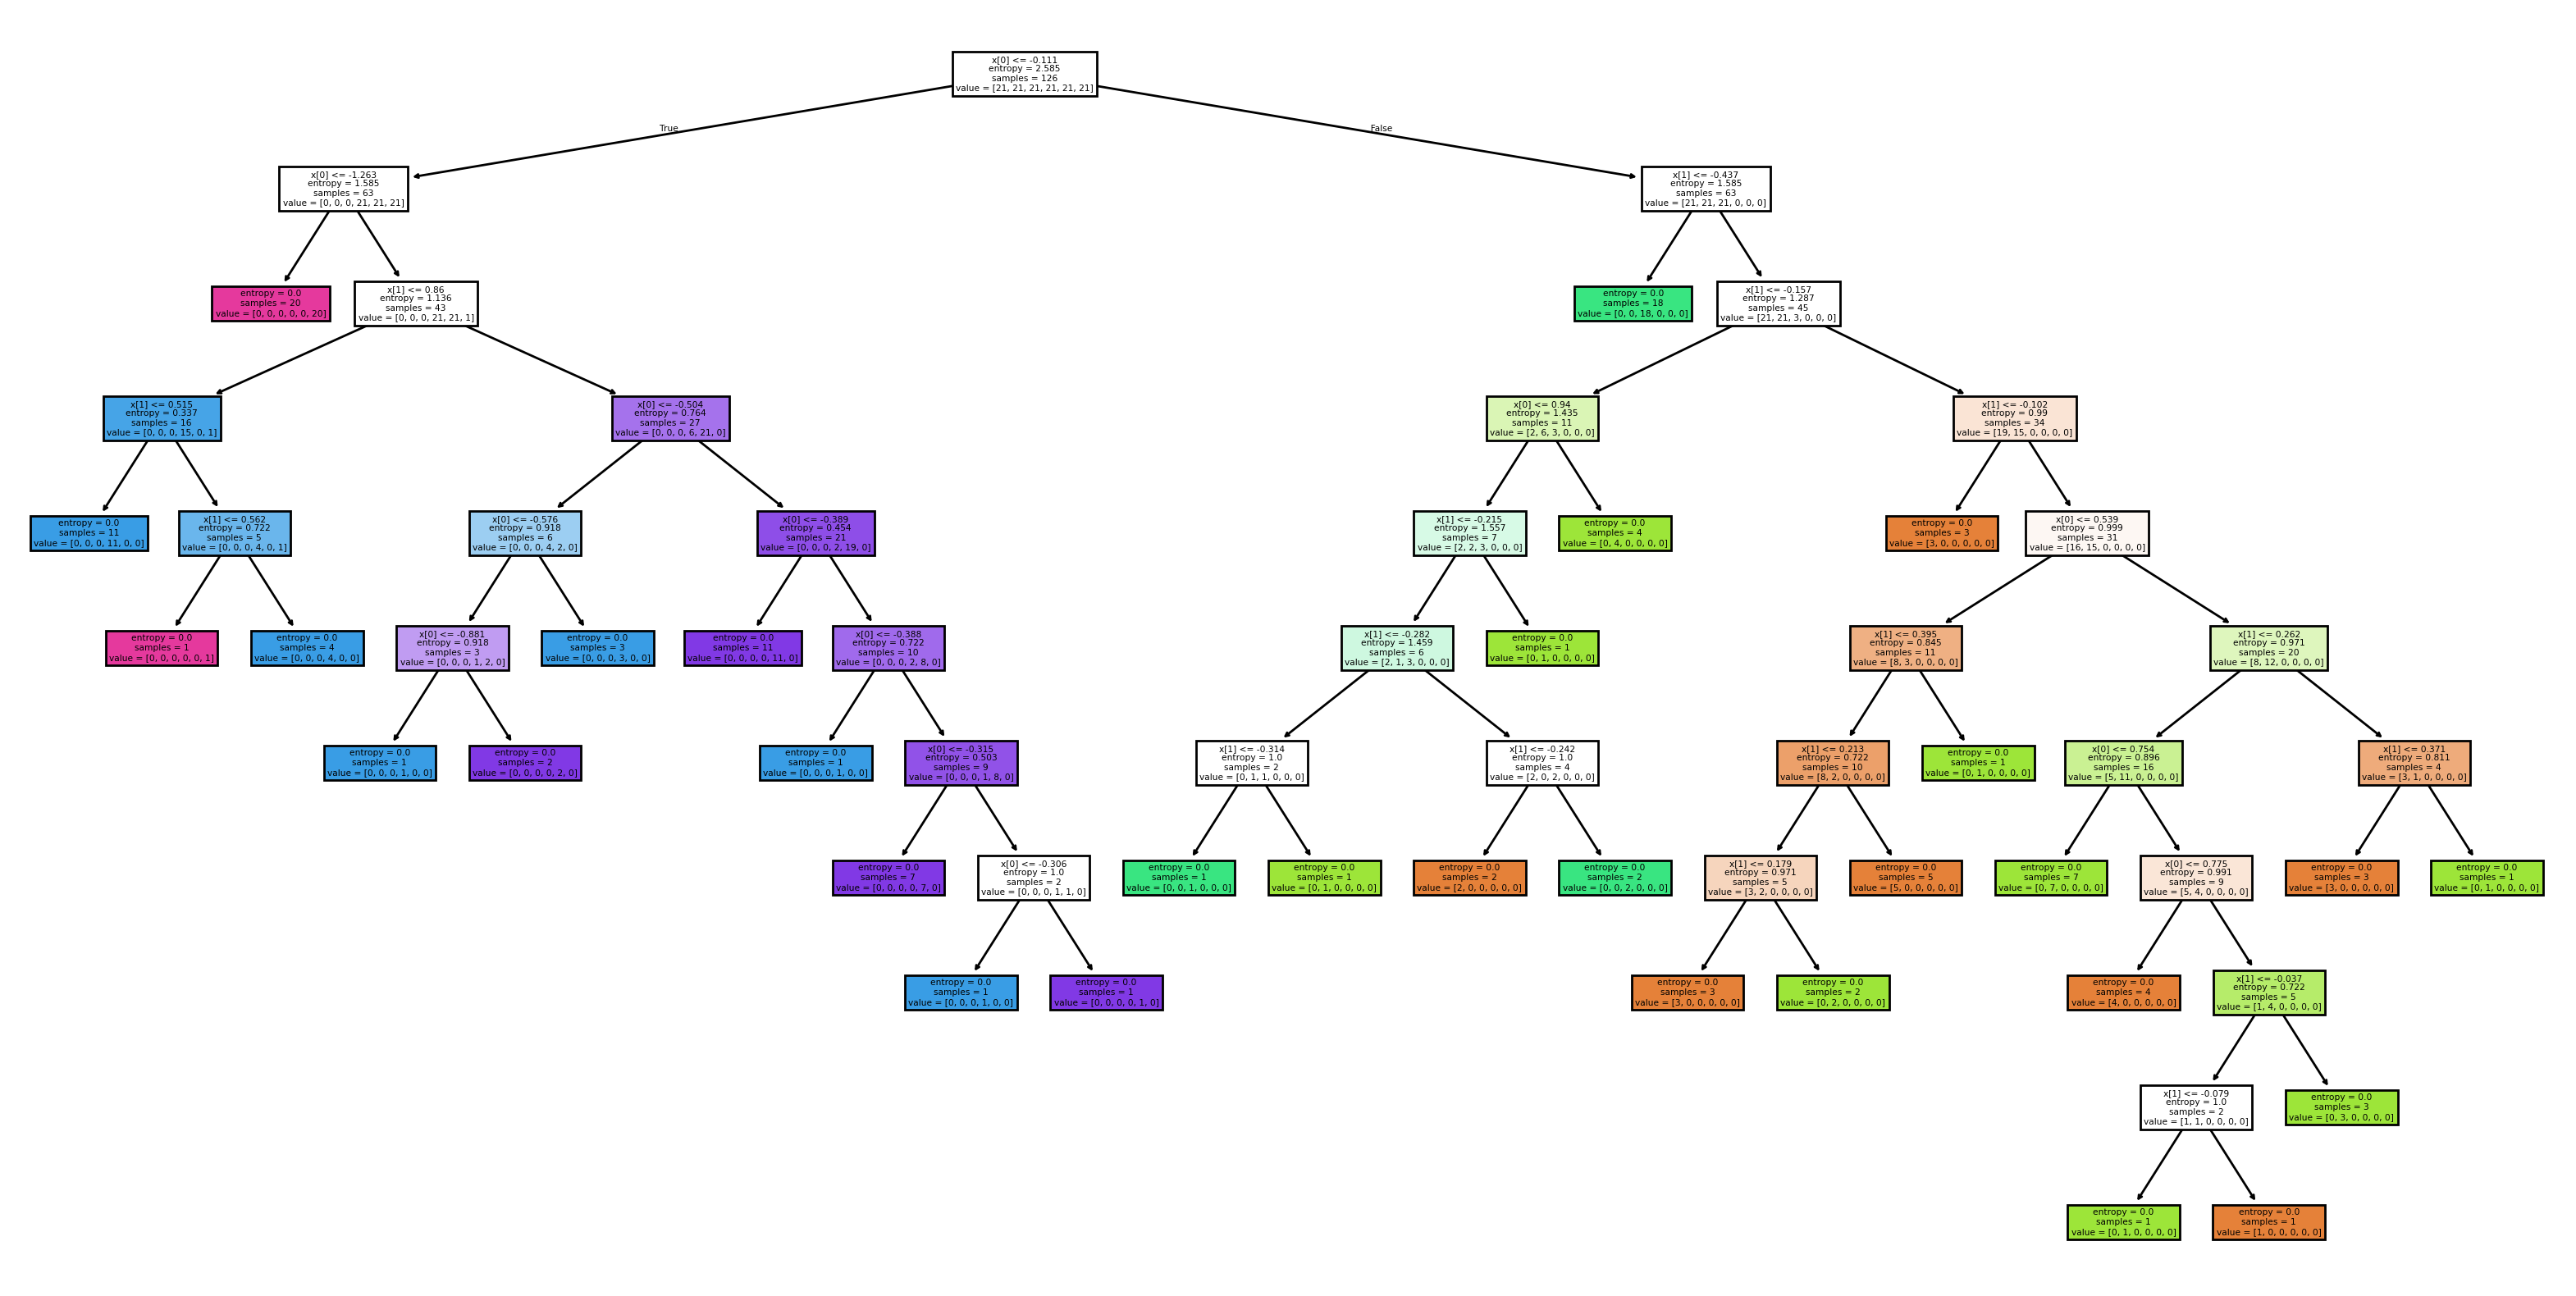

In [78]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt_e_pca, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  46.2962962962963%
Precision :  59.17508417508418%
Recall :  46.2962962962963%


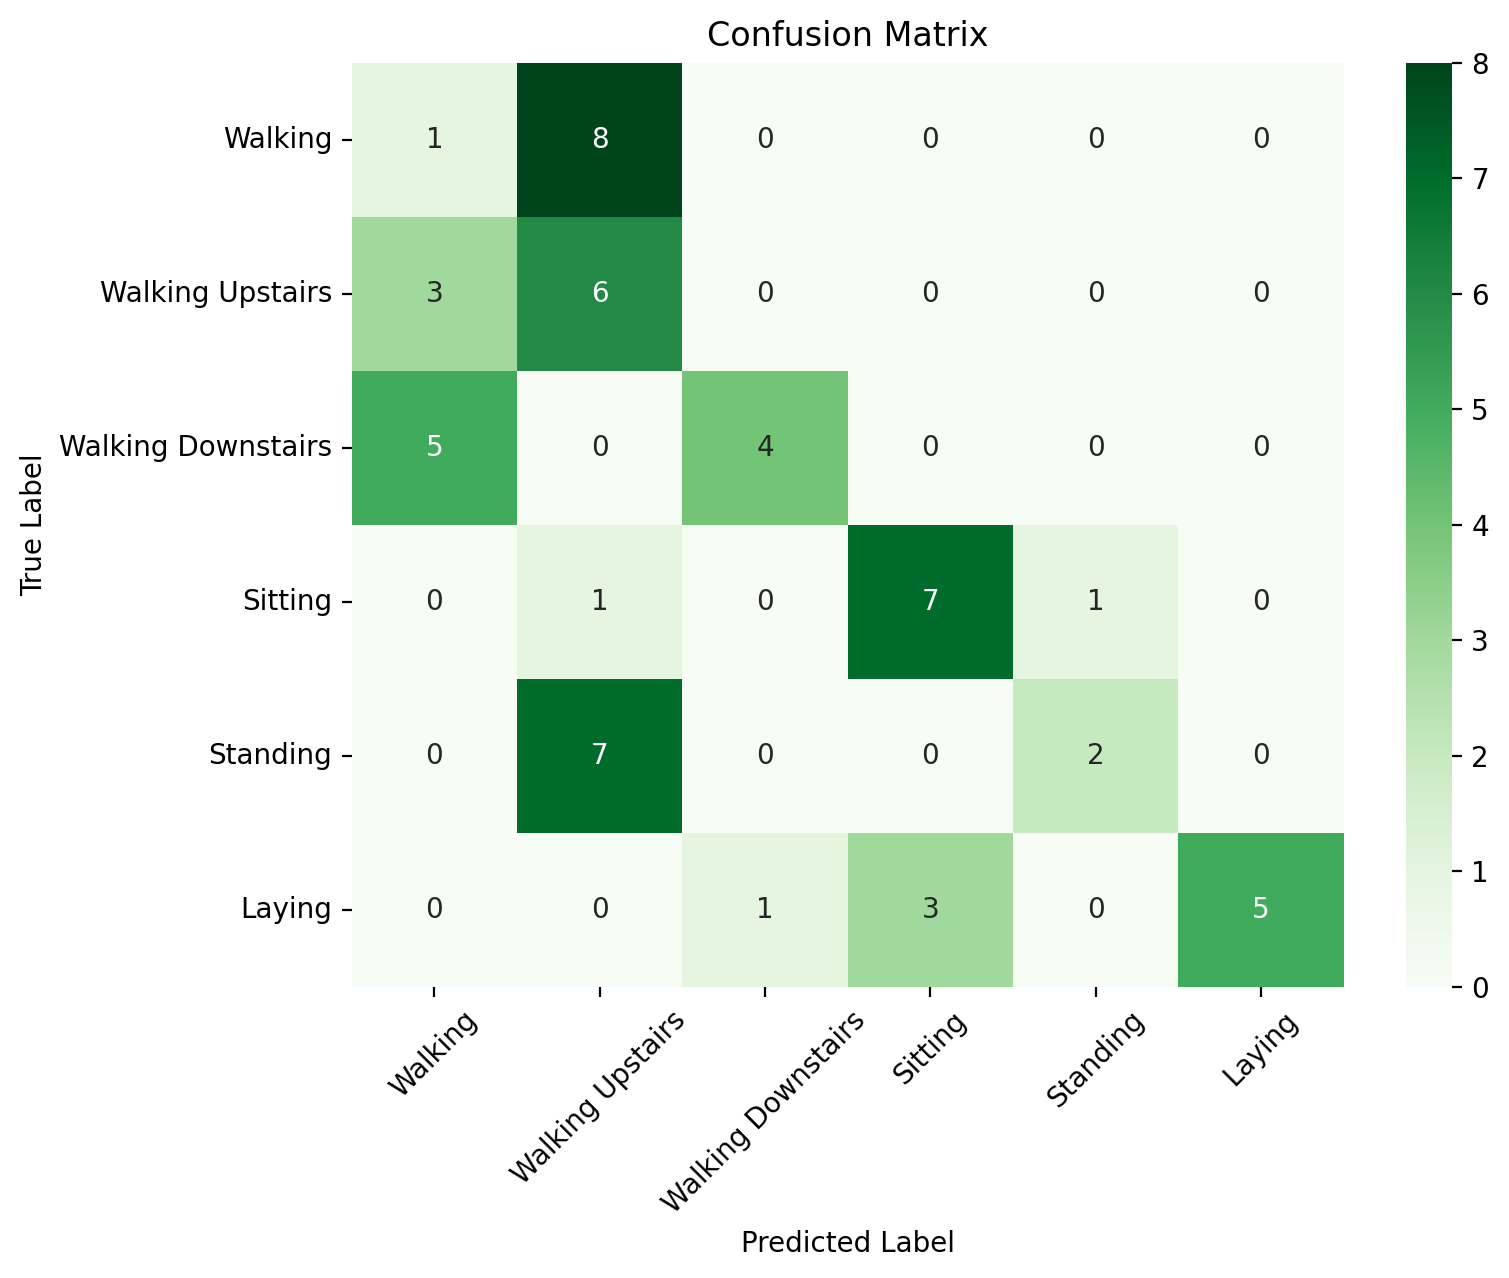

In [124]:

y_hat=sk_dt_pca_e.predict(xt_pca)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using the best 40 TSFEL features

##### Normalizing

In [80]:
Xtrain=pd.read_csv("x_tsfel.csv")
Xtest=pd.read_csv("x_tsfel_test.csv")

In [81]:
from sklearn.preprocessing import StandardScaler
Xtrain.columns=[None]*Xtrain.shape[1]
Xtest.columns=[None]*Xtest.shape[1]
scalar=StandardScaler()
X_Train_Tsfel_n=scalar.fit_transform(Xtrain)
X_Test_Tsfel_n=scalar.transform(Xtest)
x2=X_Train_Tsfel_n
xt2=X_Test_Tsfel_n
joblib.dump(scalar,'scaler2.pkl')

['scaler2.pkl']

##### Using Gini

Making Decision Tree

In [82]:
sk_dt_g2=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt2_g=sk_dt_g2.fit(x2,y_train)
depth=sk_dt2_g.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt2_g,'t2_dt2_g.pkl')

Depth of Decision Tree: 7


['t2_dt2_g.pkl']

Decision Tree Plot

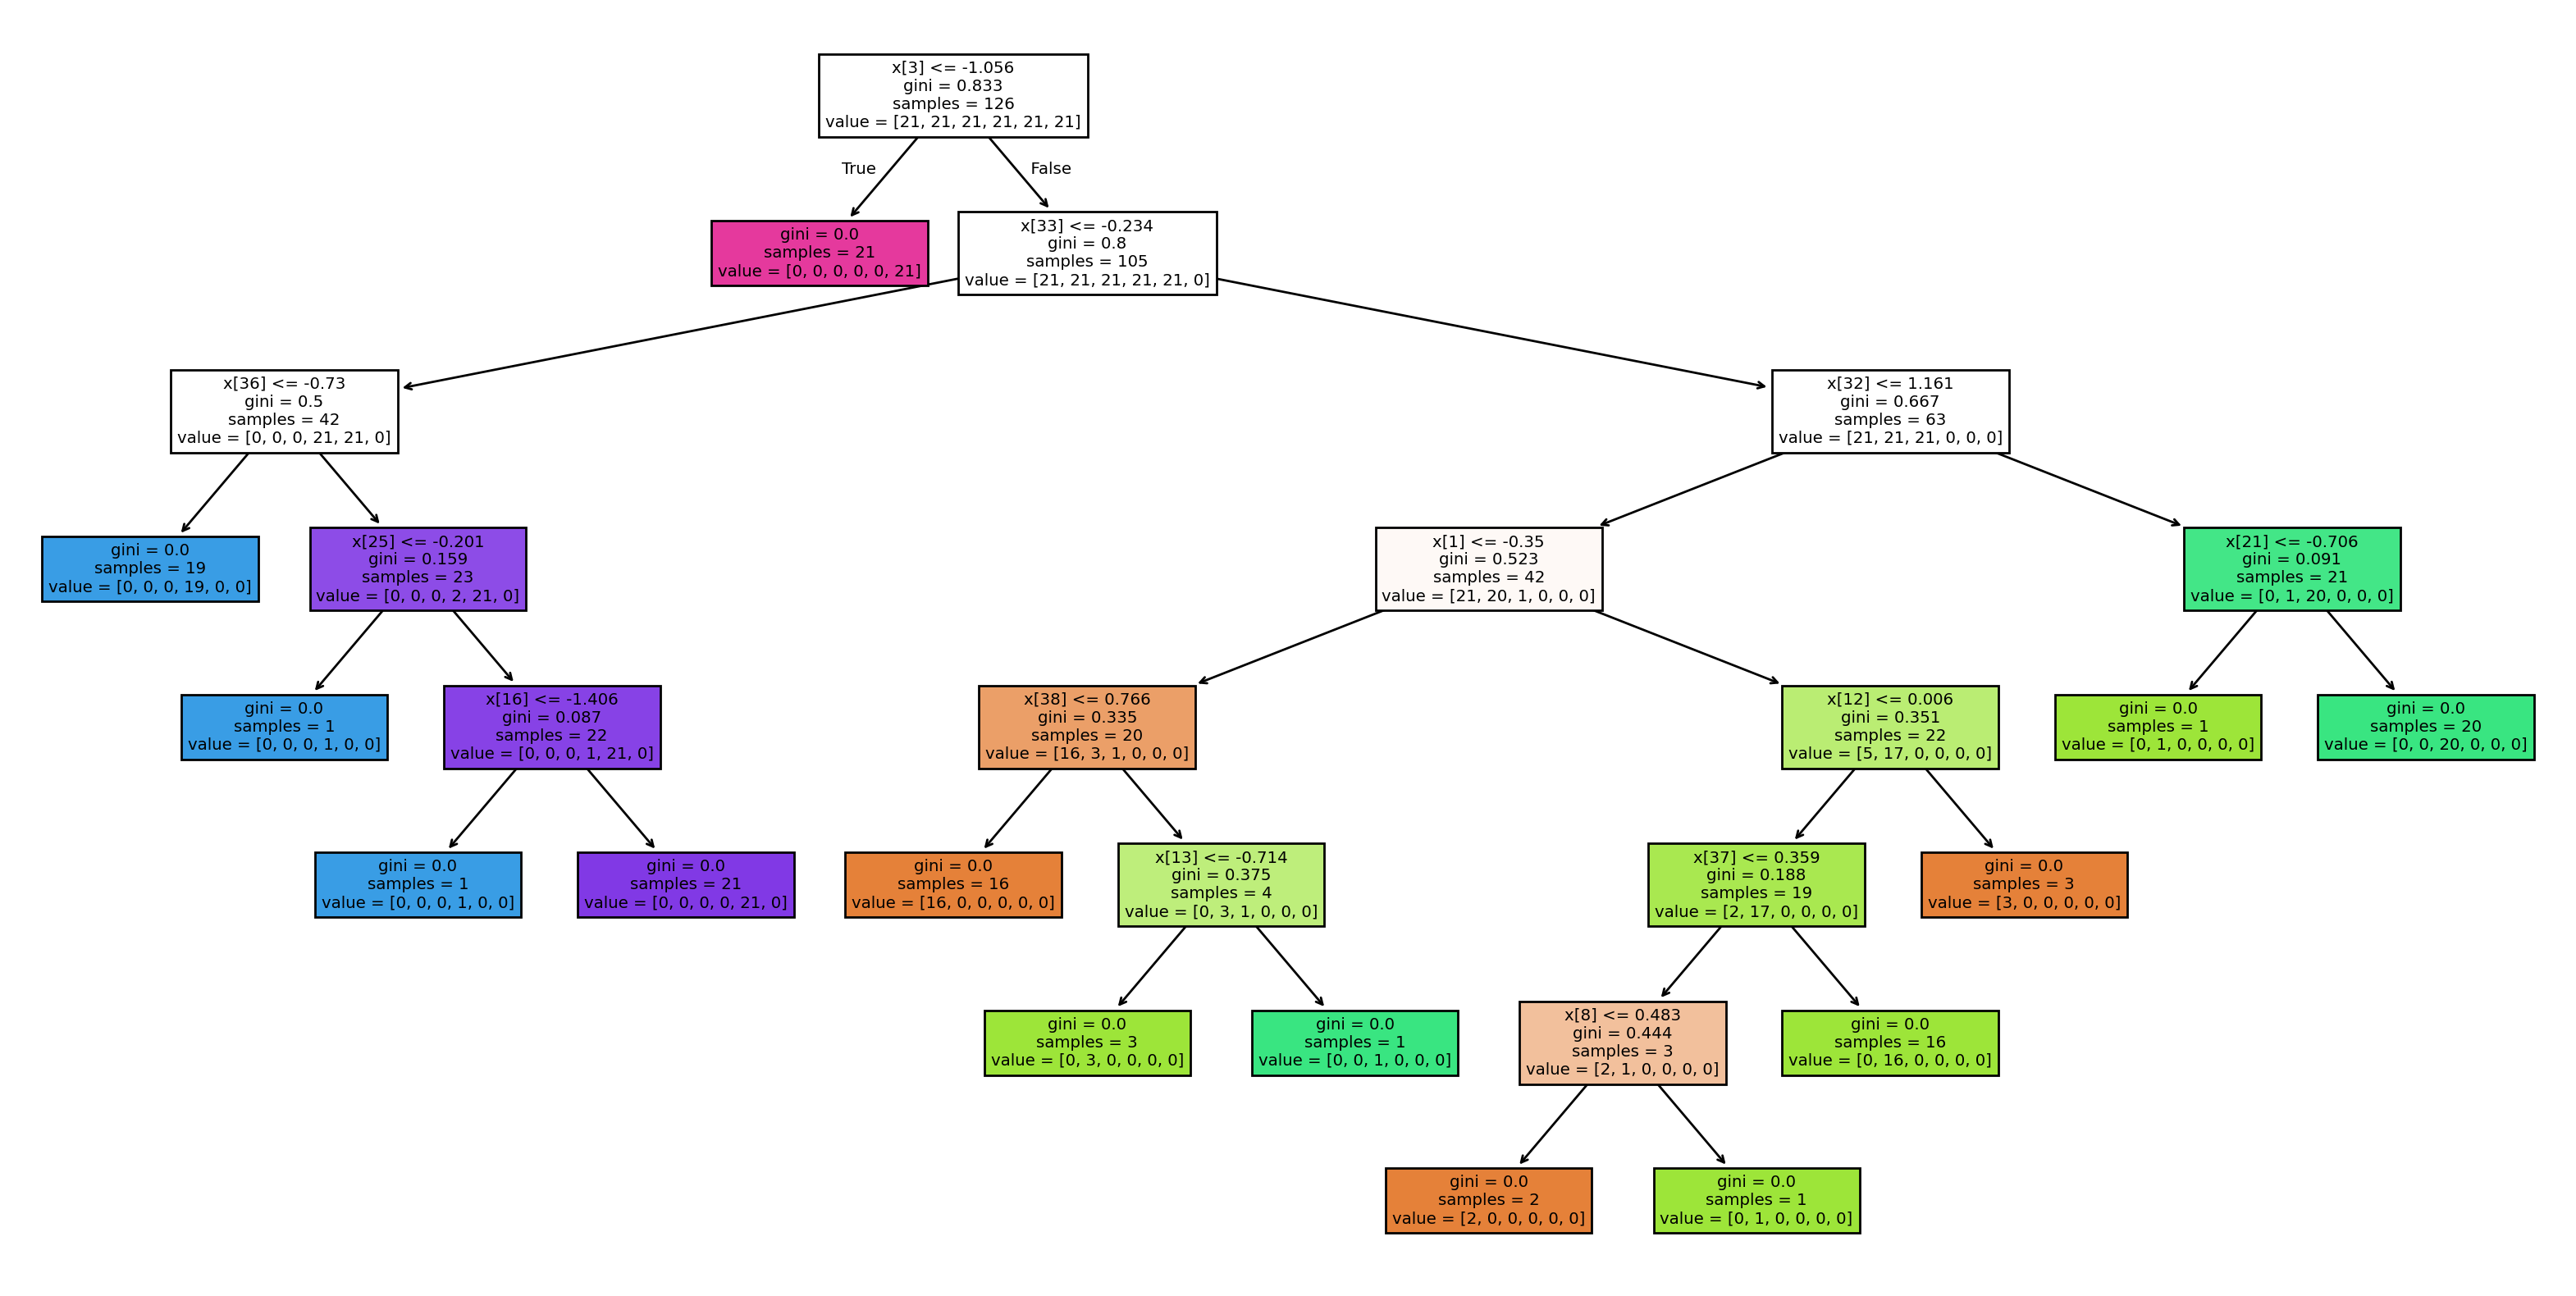

In [83]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt2_g, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  79.62962962962963%
Precision :  80.18939393939394%
Recall :  79.62962962962963%


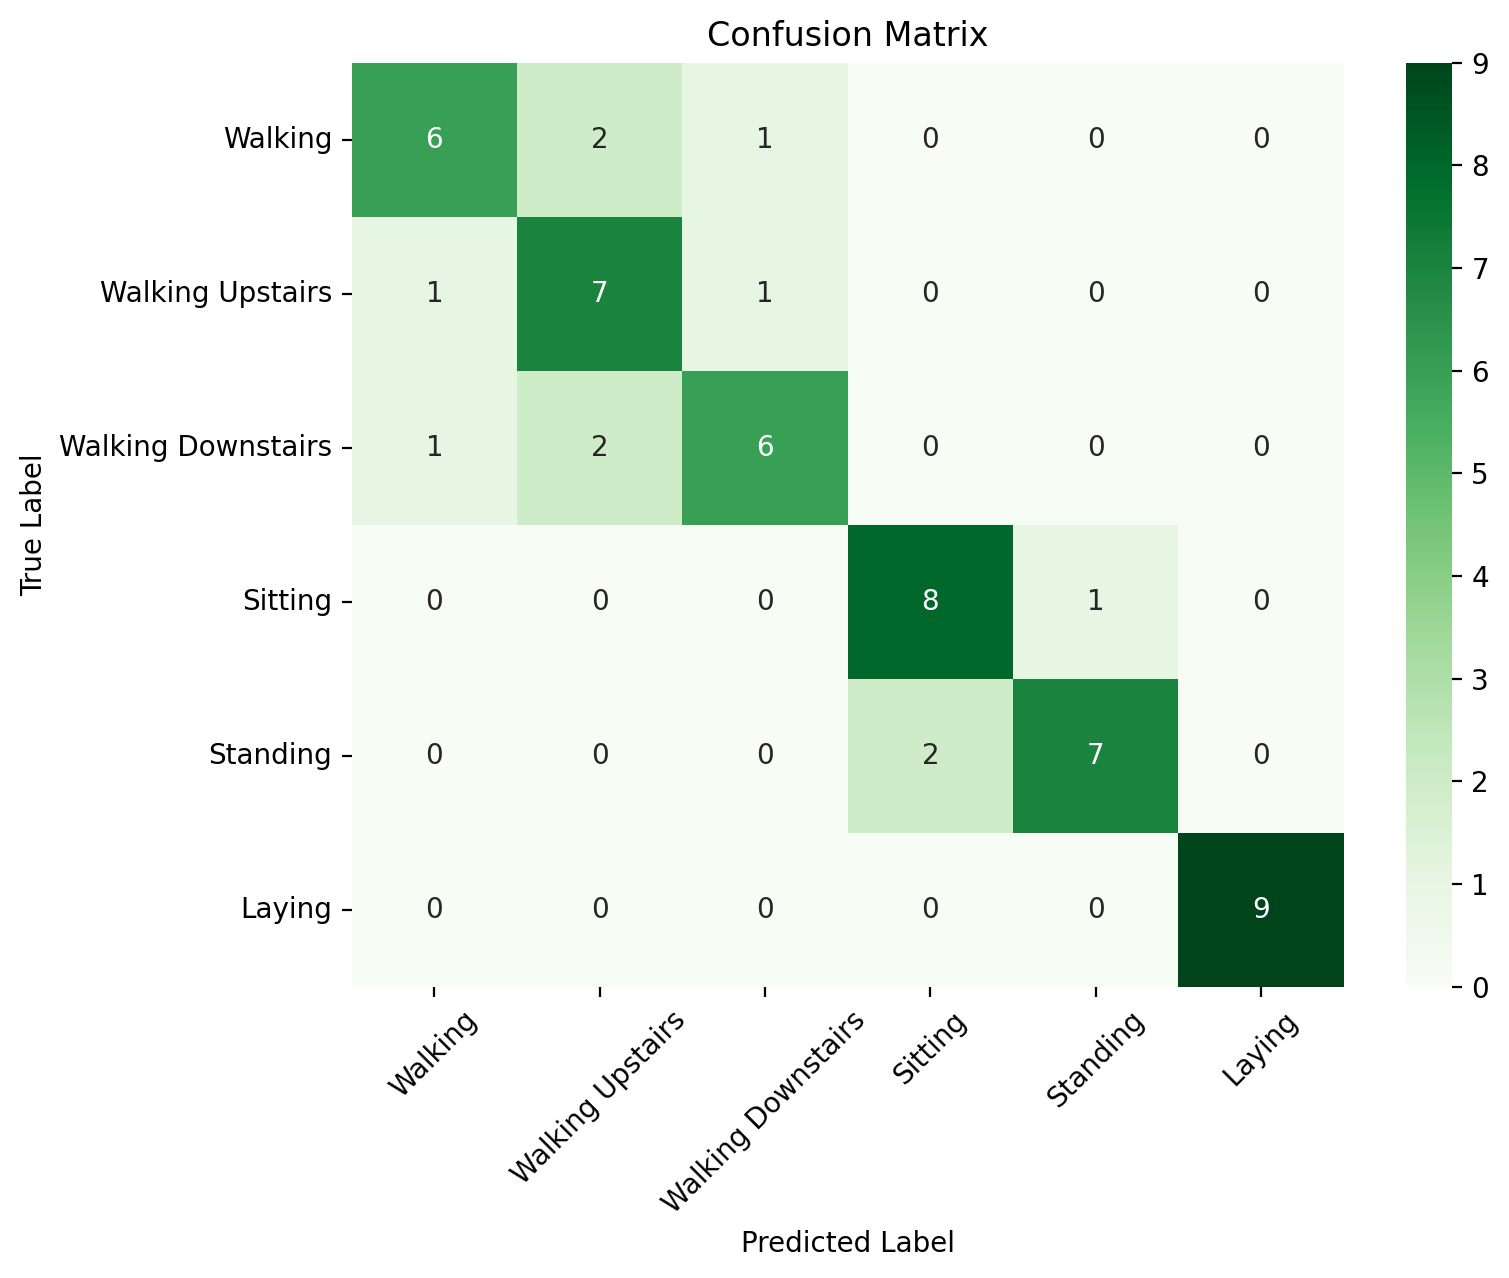

In [125]:

y_hat=sk_dt2_g.predict(xt2)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Using Entropy

Making Decision Tree

In [85]:
sk_dt_e2=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt2_e=sk_dt_e2.fit(x2,y_train)
depth=sk_dt2_e.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt2_e,'t2_dt2_e.pkl')

Depth of Decision Tree: 6


['t2_dt2_e.pkl']

Decision Tree Plot

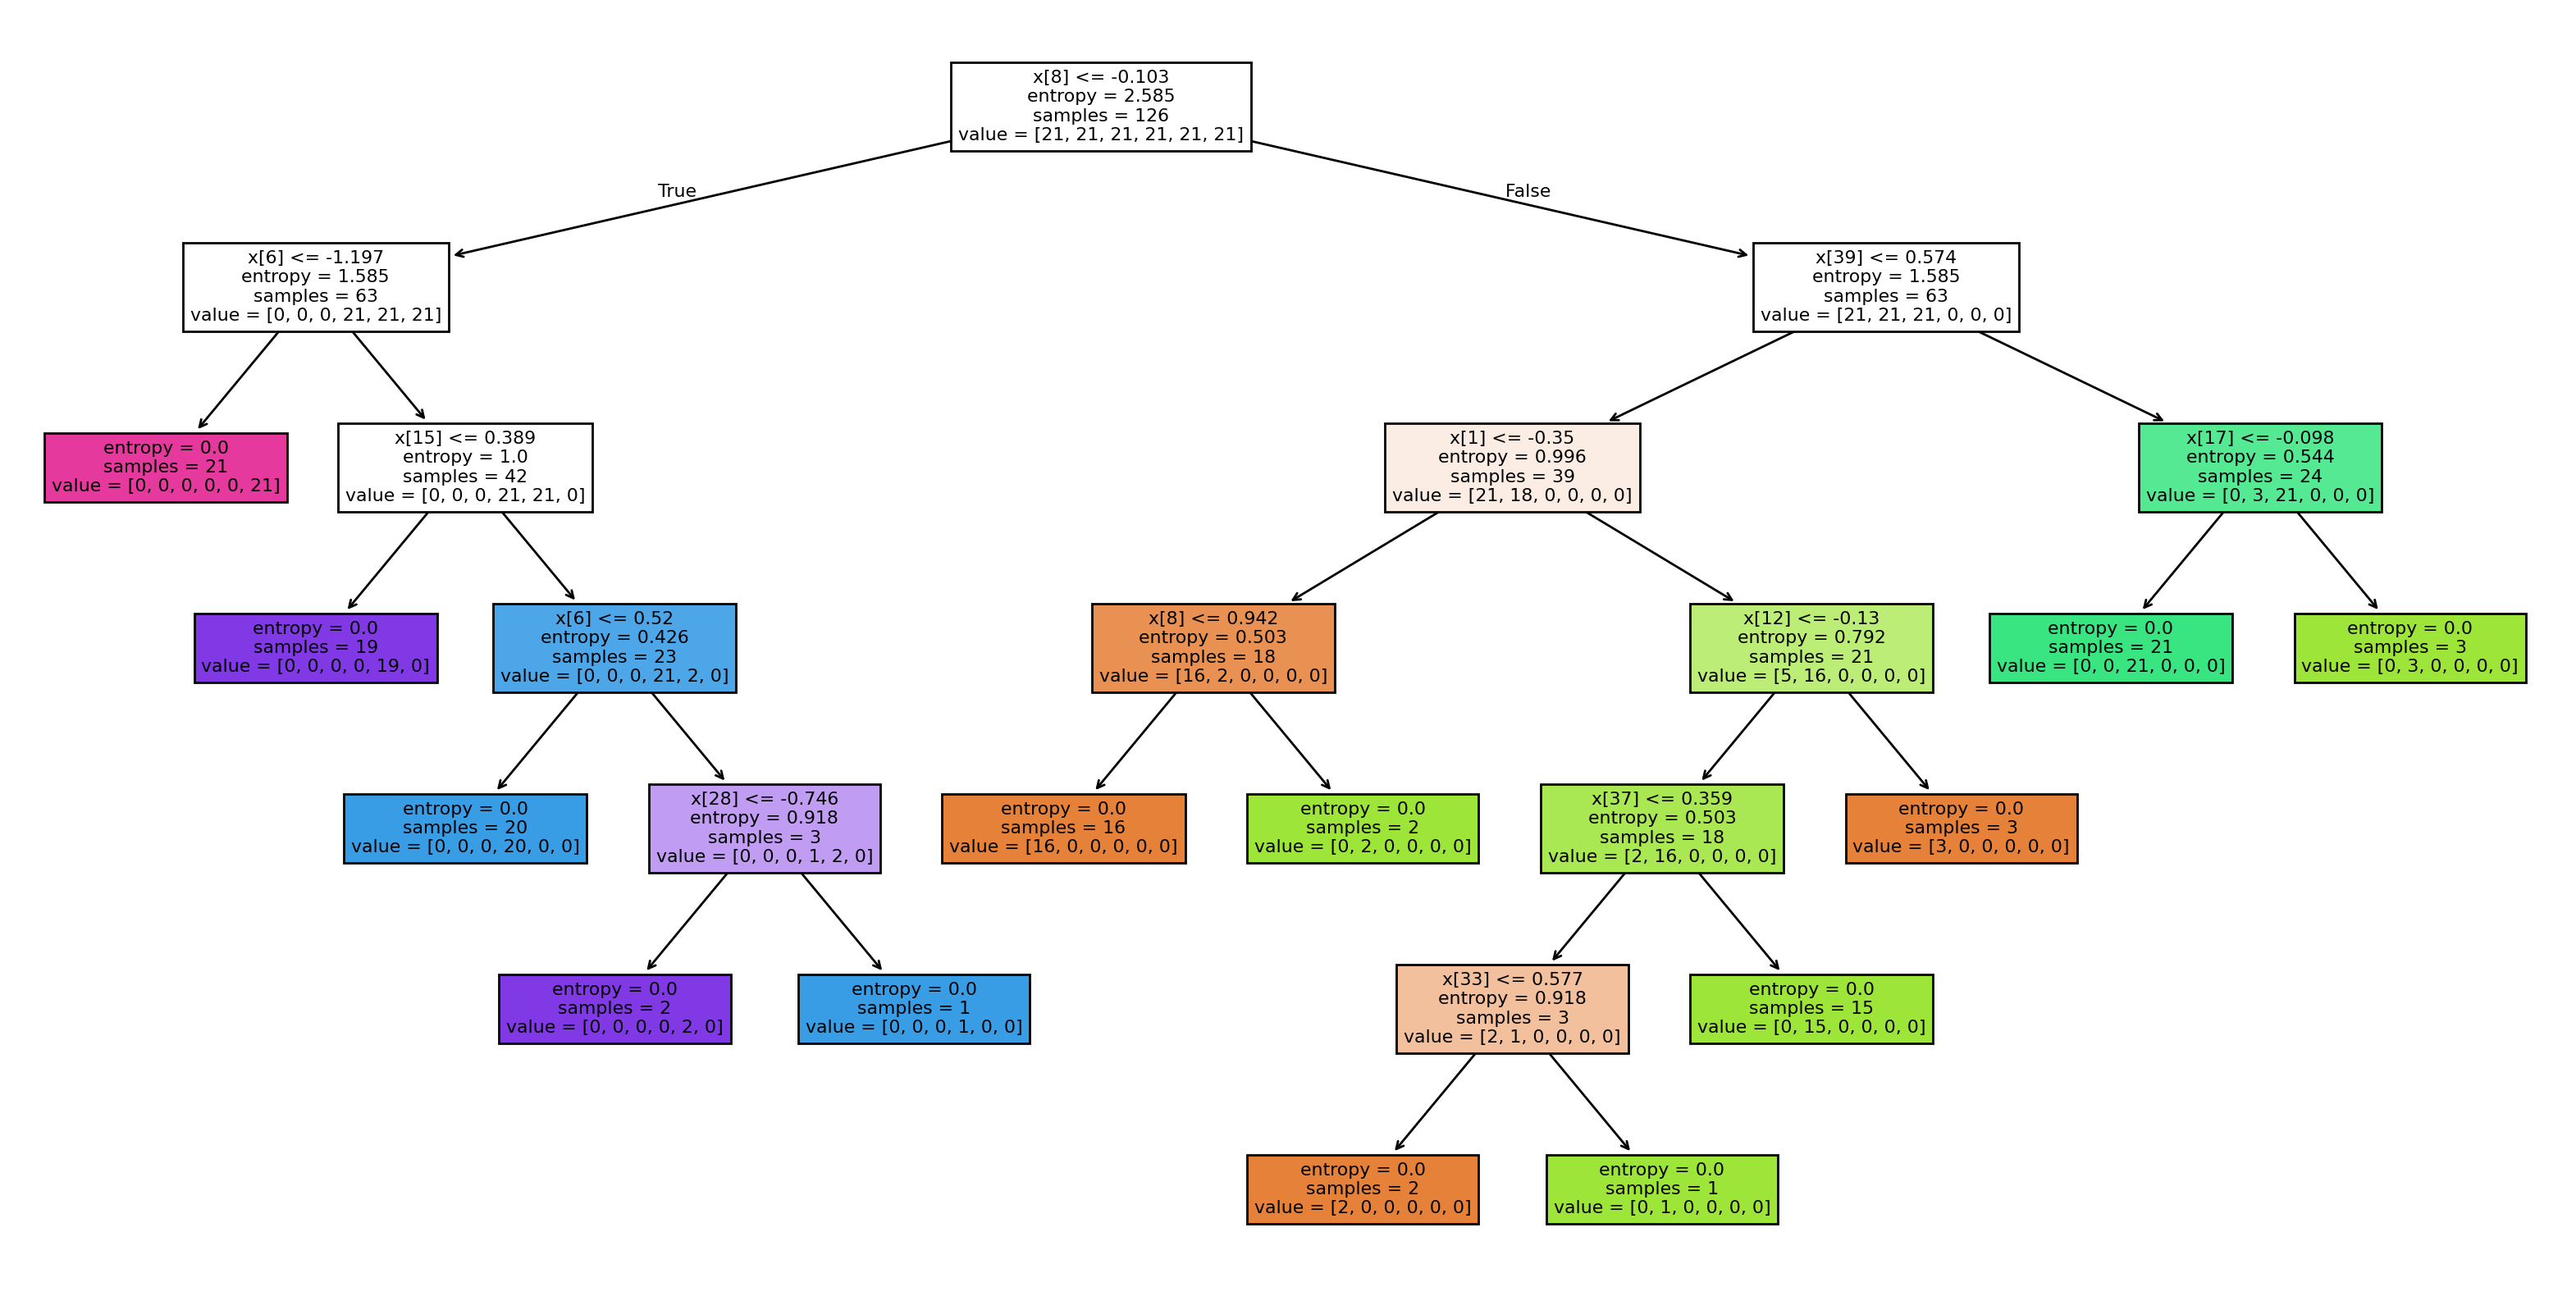

In [86]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt2_e, filled=True)
plt.show()

 Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  75.92592592592592%
Precision :  77.25108225108227%
Recall :  75.92592592592592%


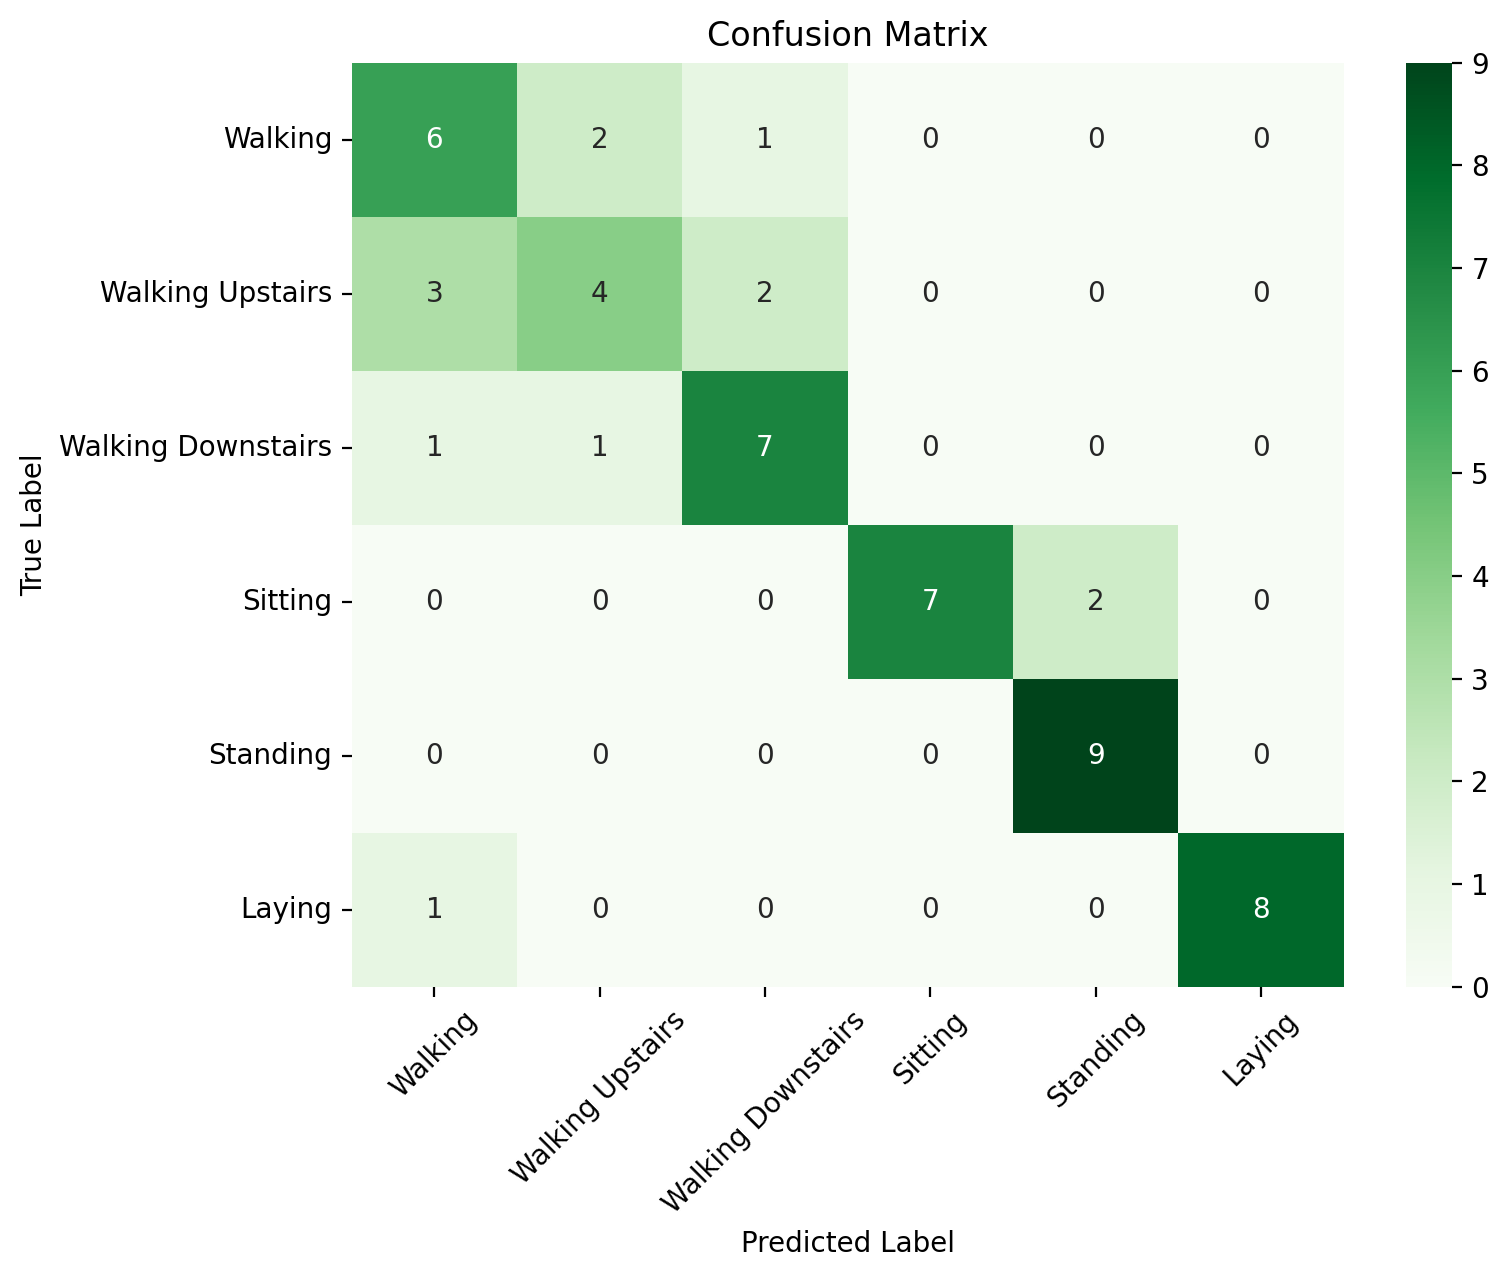

In [126]:

y_hat=sk_dt2_e.predict(xt2)
a=skl.metrics.accuracy_score(y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 3: Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

#### Using the extra 561 features

##### loading data and normalising

In [88]:
#of=Other Features
of_x_train=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True)
of_x_test=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True)
of_y_train=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/train/y_train.txt",delim_whitespace=True)
of_y_test=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/test/y_test.txt",delim_whitespace=True)


/var/folders/00/rfjj9nr57f13vcmft00bf6br0000gn/T/ipykernel_24959/2861672765.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  of_x_train=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True)
/var/folders/00/rfjj9nr57f13vcmft00bf6br0000gn/T/ipykernel_24959/2861672765.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  of_x_test=pd.read_csv("/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True)
/var/folders/00/rfjj9nr57f13vcmft00bf6br0000gn/T/ipykernel_24959/2861672765.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  of_y_train=pd.read_csv("/Users/

In [89]:
print(of_x_train.shape)
print(of_x_test.shape)
of_x_train = of_x_train.to_numpy()  
of_x_test = of_x_test.to_numpy()

(7351, 561)
(2946, 561)


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
of_x_train_n = scaler.fit_transform(of_x_train)
of_x_test_n = scaler.transform(of_x_test)


In [91]:
of_x=of_x_train_n
of_xt=of_x_test_n
of_y=of_y_train
yt=of_y_test

##### Using Gini

Making Decision Tree

In [92]:
of_dt_g=tree.DecisionTreeClassifier(criterion="gini",random_state=42,class_weight='balanced')
sk_of_dt_g=sk_dt_g1.fit(of_x,of_y)
depth=sk_of_dt_g.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 18


Decision Tree Plot

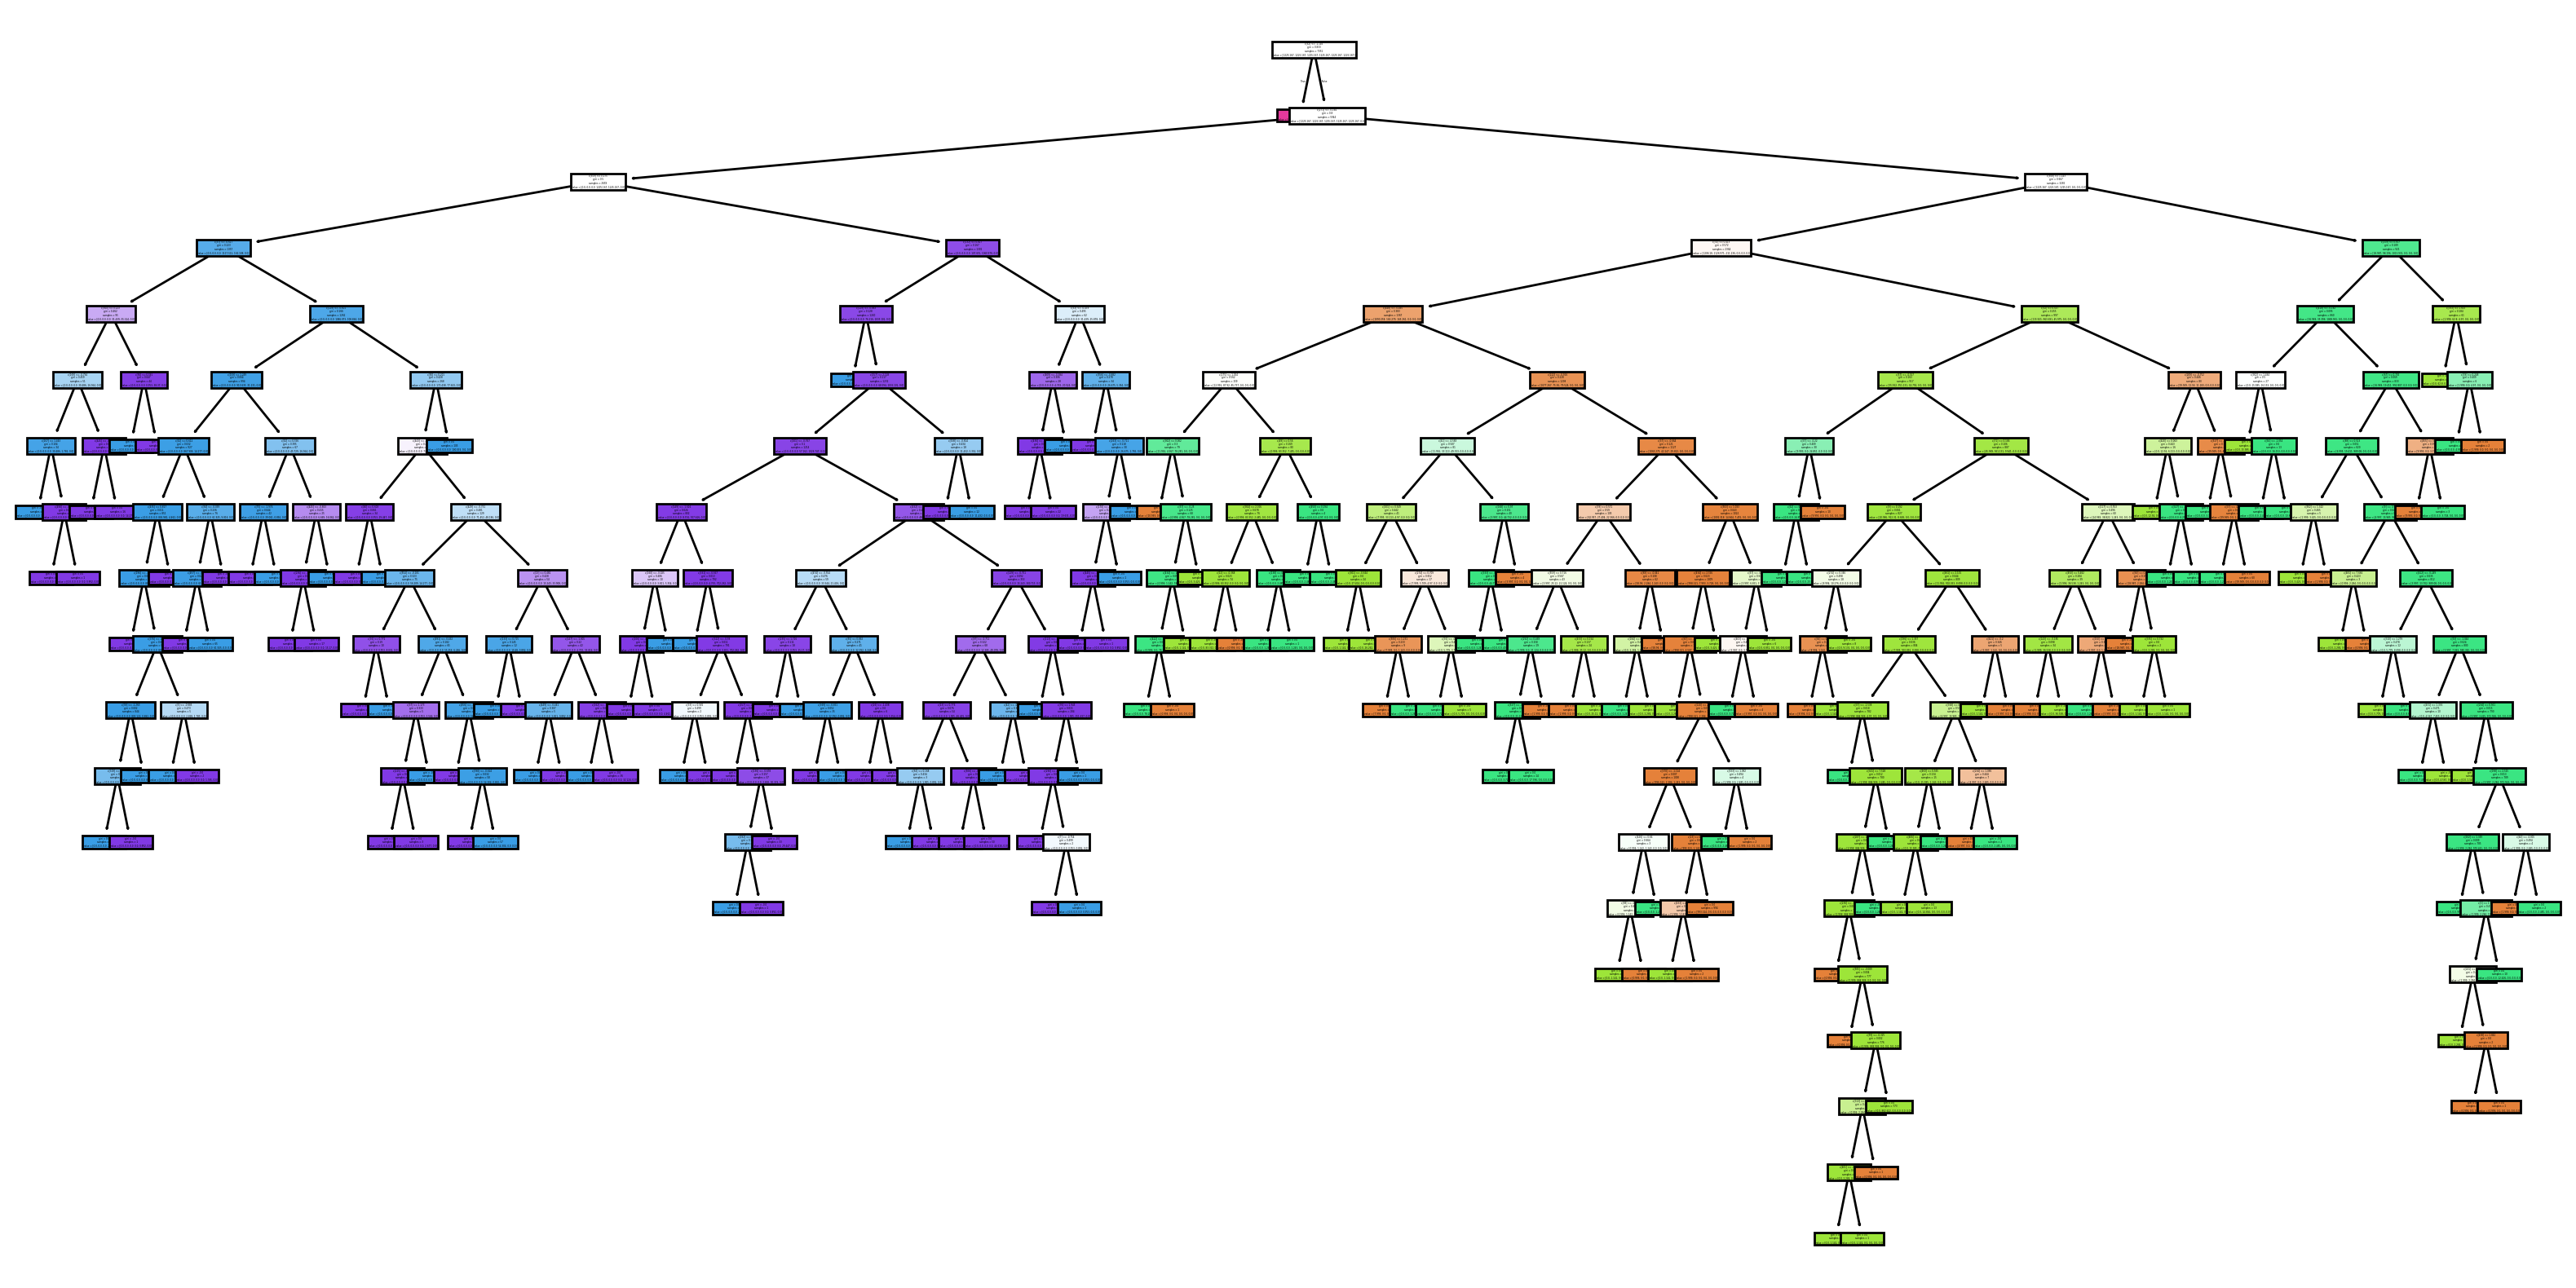

In [93]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_of_dt_g, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  85.91310251188051%
Precision :  85.68466828334348%
Recall :  85.5125108822184%


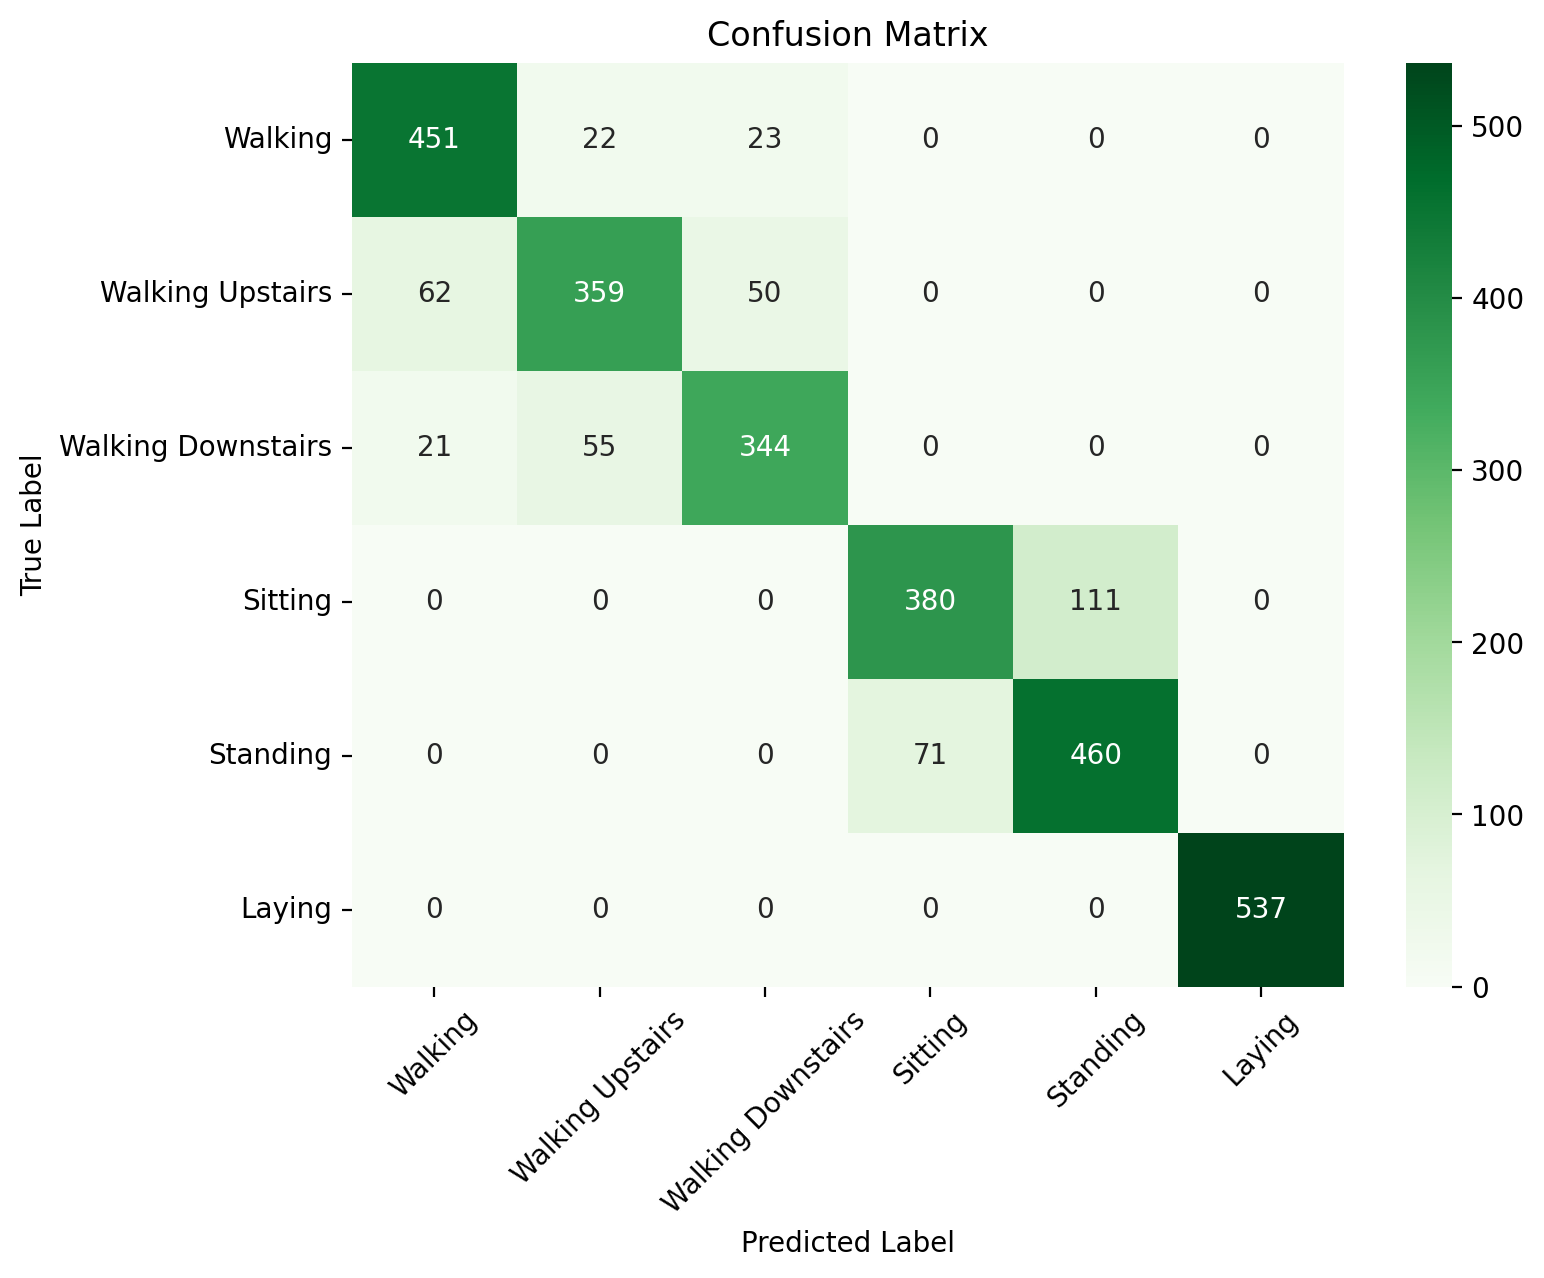

In [127]:

y_hat=sk_of_dt_g.predict(of_xt)
a=skl.metrics.accuracy_score(yt,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(yt,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(yt,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(yt,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Using Entropy

Making Decision Tree

In [95]:
of_dt_e=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,class_weight='balanced')
sk_of_dt_e=of_dt_e.fit(of_x,of_y)
depth=sk_of_dt_e.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 15


 Decision Tree Plot

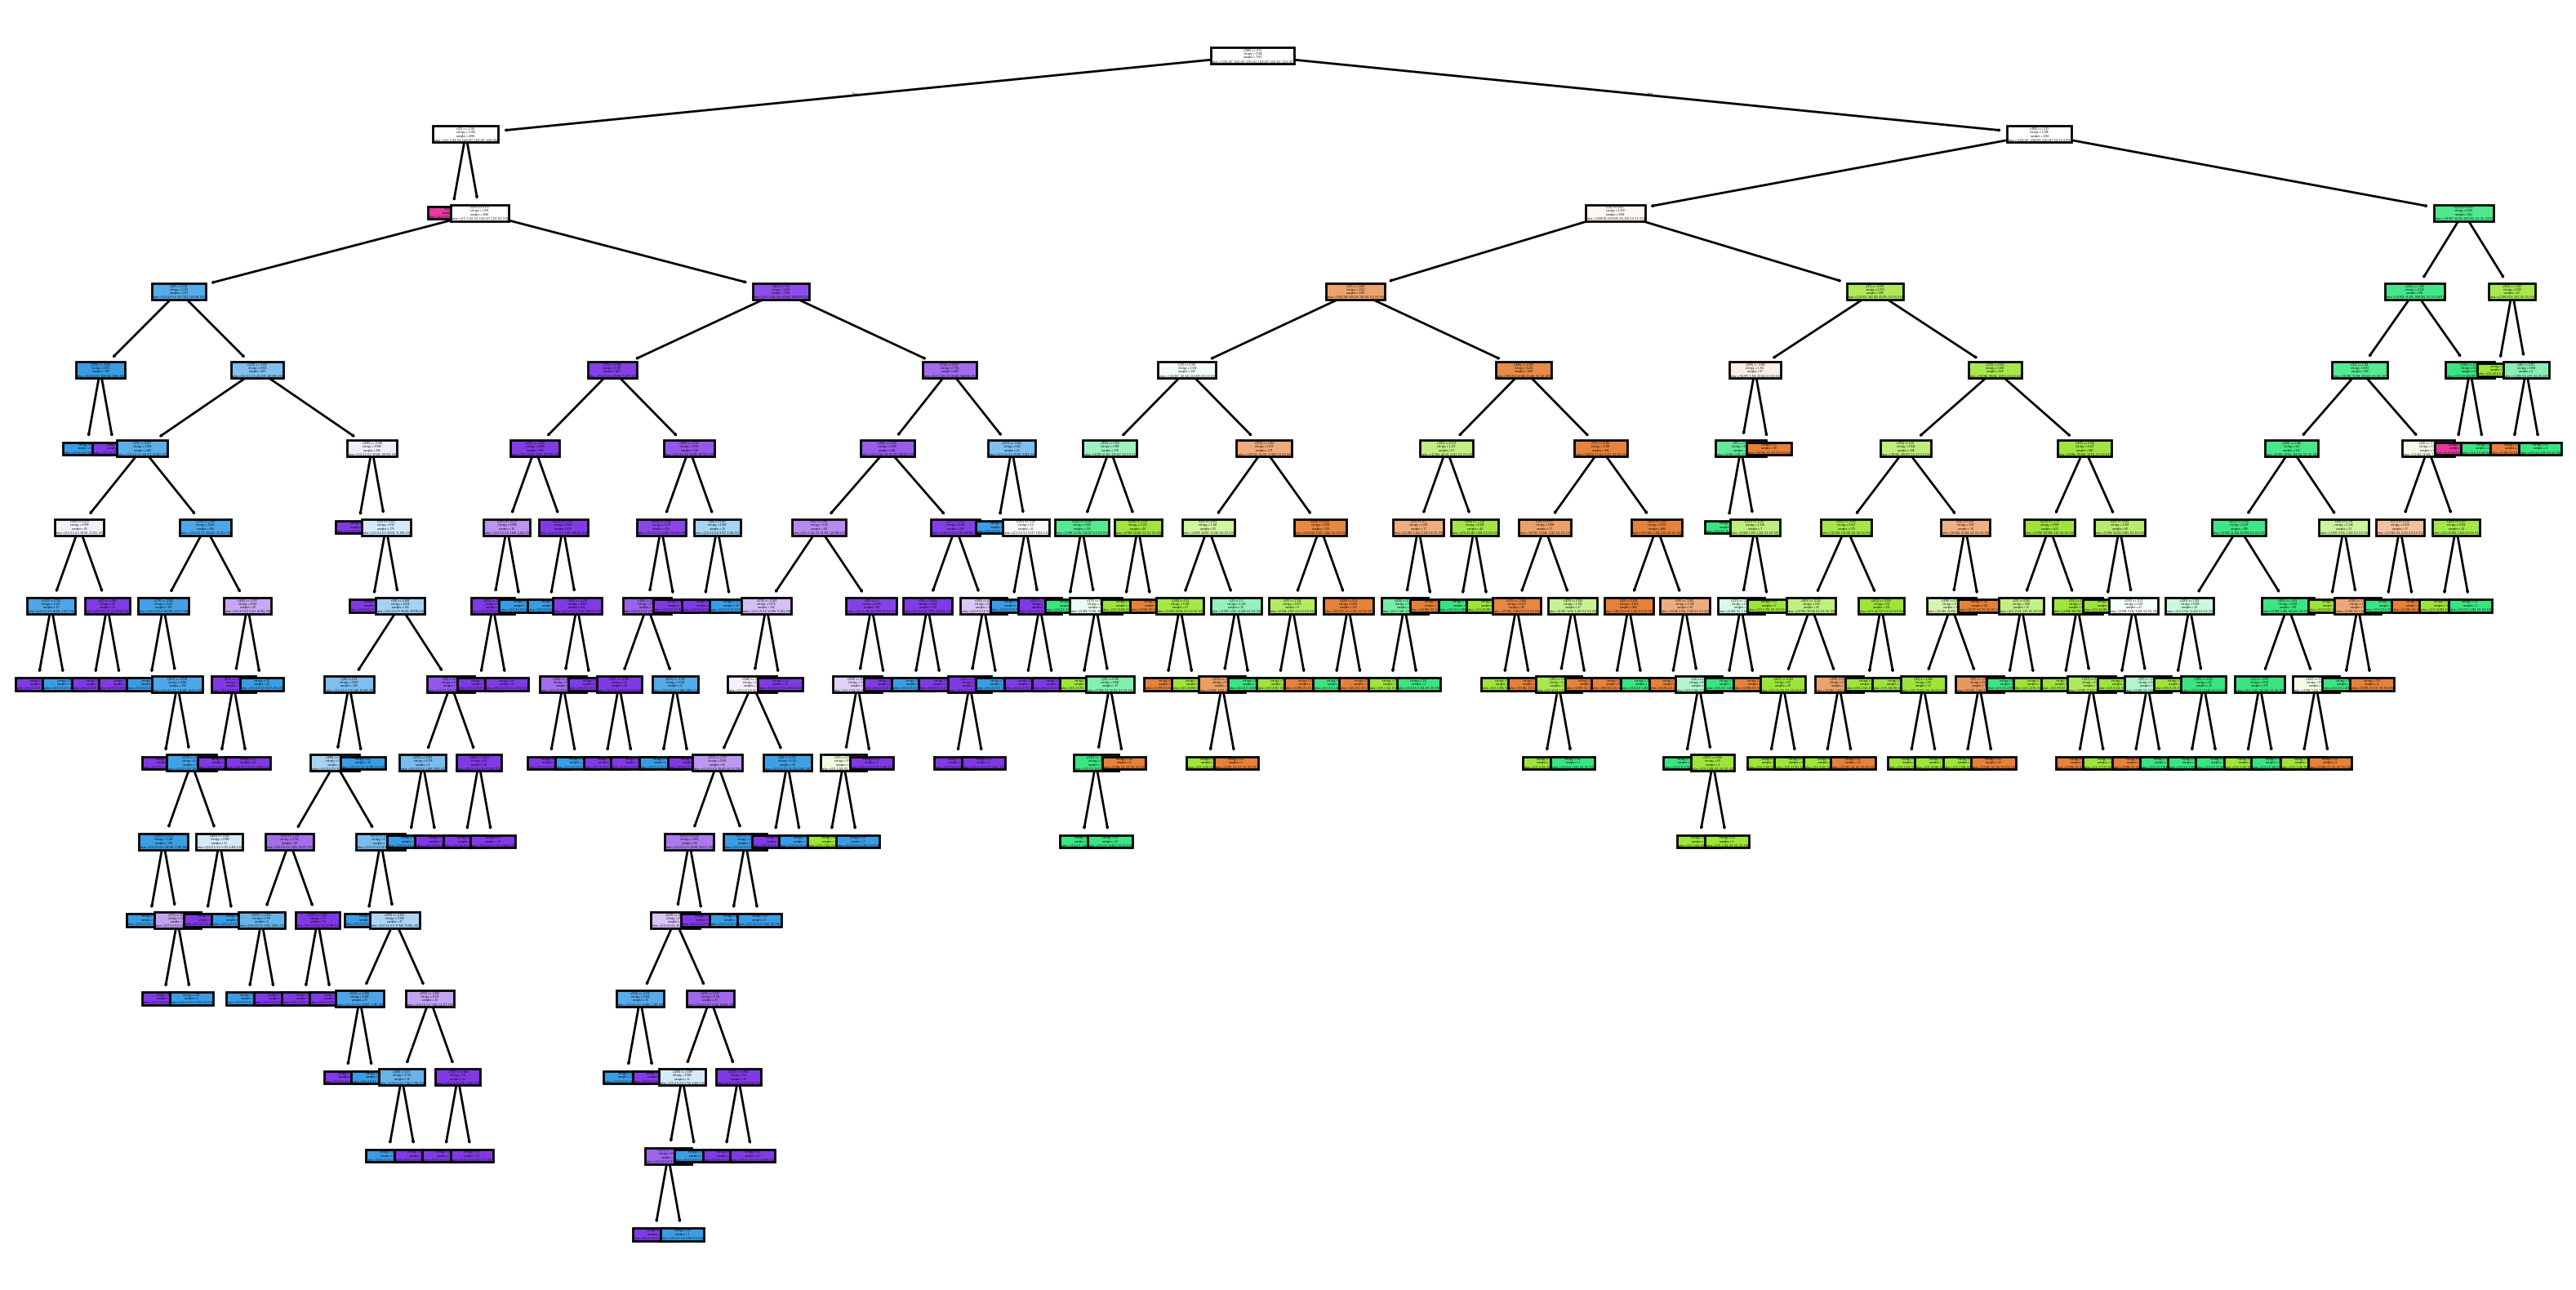

In [96]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_of_dt_e, filled=True)
plt.show()

 Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  84.45349626612357%
Precision :  84.26737349823668%
Recall :  83.91097630718639%


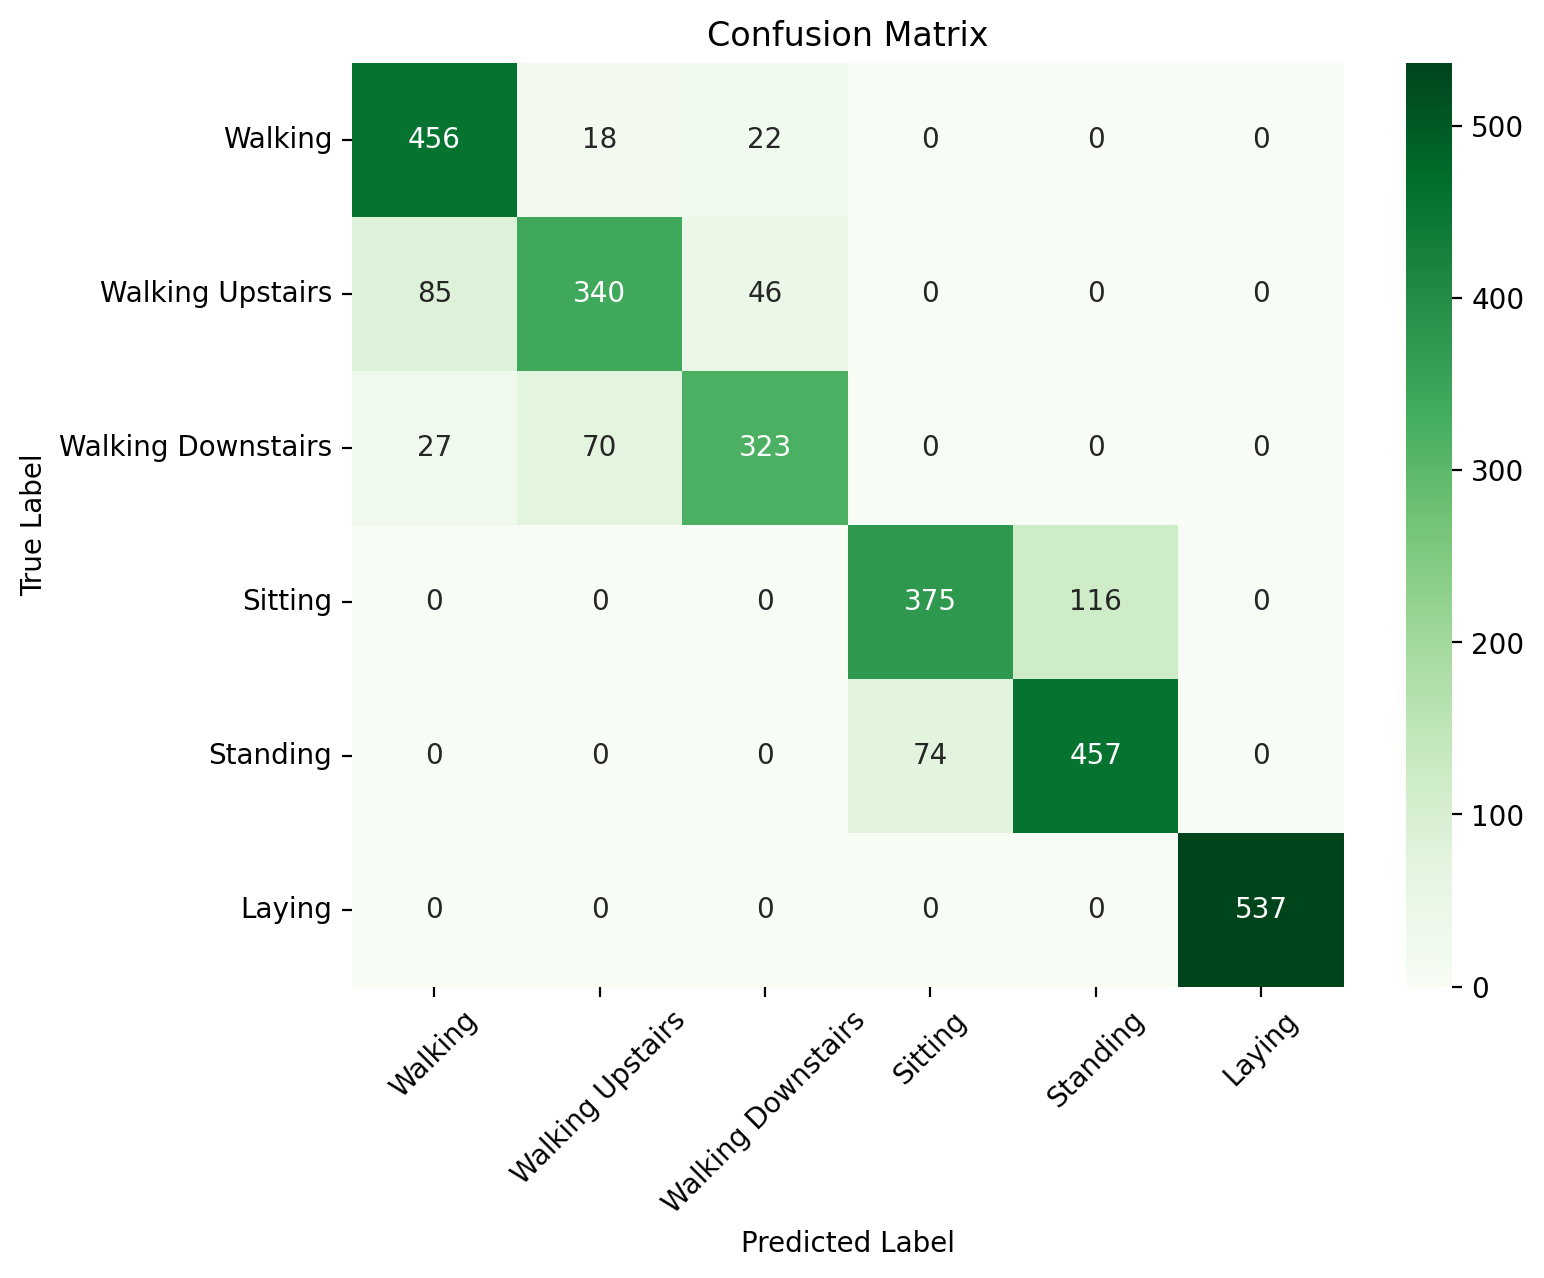

In [128]:

y_hat=sk_of_dt_e.predict(of_xt)
a=skl.metrics.accuracy_score(yt,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(yt,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(yt,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(yt,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using the extra features given in inertial signals (body_acc and body_gyro)

In [98]:
from Body_MakeDataset import Body_X_train,Body_X_test,Body_y_train,Body_y_test
from Gyro_MakeDataset import Gyro_X_train,Gyro_X_test

Extra_X_train=np.concatenate((Body_X_train,Gyro_X_train),axis=-1)
Extra_X_test=np.concatenate((Body_X_test,Gyro_X_test),axis=-1)


##### Normalising

In [99]:
def my_normalise(acc_tr,acc_te):
        meany=np.mean(acc_tr)
        stdy=np.std(acc_tr)
        acc__tr_n=(acc_tr-meany)/(stdy)
        acc_te_n=(acc_te-meany)/(stdy)
        return acc__tr_n,acc_te_n

In [100]:
body_x_tr=[]
body_y_tr=[]
body_z_tr=[]
gyro_x_tr=[]
gyro_y_tr=[]
gyro_z_tr=[]
for i in range(94):
    for j in range(500):
        body_x_tr.append(Extra_X_train[i][j][0])
        body_y_tr.append(Extra_X_train[i][j][1])
        body_z_tr.append(Extra_X_train[i][j][2])
        gyro_x_tr.append(Extra_X_train[i][j][3])
        gyro_y_tr.append(Extra_X_train[i][j][4])
        gyro_z_tr.append(Extra_X_train[i][j][5])
body_x_te=[]
body_y_te=[]
body_z_te=[]
gyro_x_te=[]
gyro_y_te=[]
gyro_z_te=[]
for i in range(41):
    for j in range(500):
        body_x_te.append(Extra_X_test[i][j][0])
        body_y_te.append(Extra_X_test[i][j][1])
        body_z_te.append(Extra_X_test[i][j][2])
        gyro_x_te.append(Extra_X_test[i][j][3])
        gyro_y_te.append(Extra_X_test[i][j][4])
        gyro_z_te.append(Extra_X_test[i][j][5])



In [101]:
body_x_tr_n,body_x_te_n=my_normalise(body_x_tr,body_x_te)
body_y_tr_n,body_y_te_n=my_normalise(body_y_tr,body_y_te)
body_z_tr_n,body_z_te_n=my_normalise(body_z_tr,body_z_te)
gyro_x_tr_n,gyro_x_te_n=my_normalise(gyro_x_tr,gyro_x_te)
gyro_y_tr_n,gyro_y_te_n=my_normalise(gyro_y_tr,gyro_y_te)
gyro_z_tr_n,gyro_z_te_n=my_normalise(gyro_z_tr,gyro_z_te)

body_x_tr_n=np.array(body_x_tr_n)
body_y_tr_n=np.array(body_y_tr_n)
body_z_tr_n=np.array(body_z_tr_n)
body_x_te_n=np.array(body_x_te_n)
body_y_te_n=np.array(body_y_te_n)
body_z_te_n=np.array(body_z_te_n)

gyro_x_tr_n=np.array(gyro_x_tr_n)
gyro_y_tr_n=np.array(gyro_y_tr_n)
gyro_z_tr_n=np.array(gyro_z_tr_n)
gyro_x_te_n=np.array(gyro_x_te_n)
gyro_y_te_n=np.array(gyro_y_te_n)
gyro_z_te_n=np.array(gyro_z_te_n)

In [102]:
extra_stacked_tr=np.stack((body_x_tr_n,body_y_tr_n,body_z_tr_n,gyro_x_tr_n,gyro_y_tr_n,gyro_z_tr_n),axis=1)
extra_X_train_n=extra_stacked_tr.reshape(94,500,6)
extra_X_train_n_rs=extra_X_train_n.reshape(94,3000)
extra_stacked_te=np.stack((body_x_te_n,body_y_te_n,body_z_te_n,gyro_x_te_n,gyro_y_te_n,gyro_z_te_n),axis=1)
extra_X_test_n=extra_stacked_te.reshape(41,500,6)
extra_X_test_n_rs=extra_X_test_n.reshape(41,3000)


In [103]:
x_n=extra_X_train_n_rs
y_n=Body_y_train
xt_n=extra_X_test_n_rs

##### Using Gini

Making Decision Tree

In [104]:
sk_dt_g3=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt3_g=sk_dt_g3.fit(x_n,y_n)
depth=sk_dt3_g.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 6


Decision Tree Plot

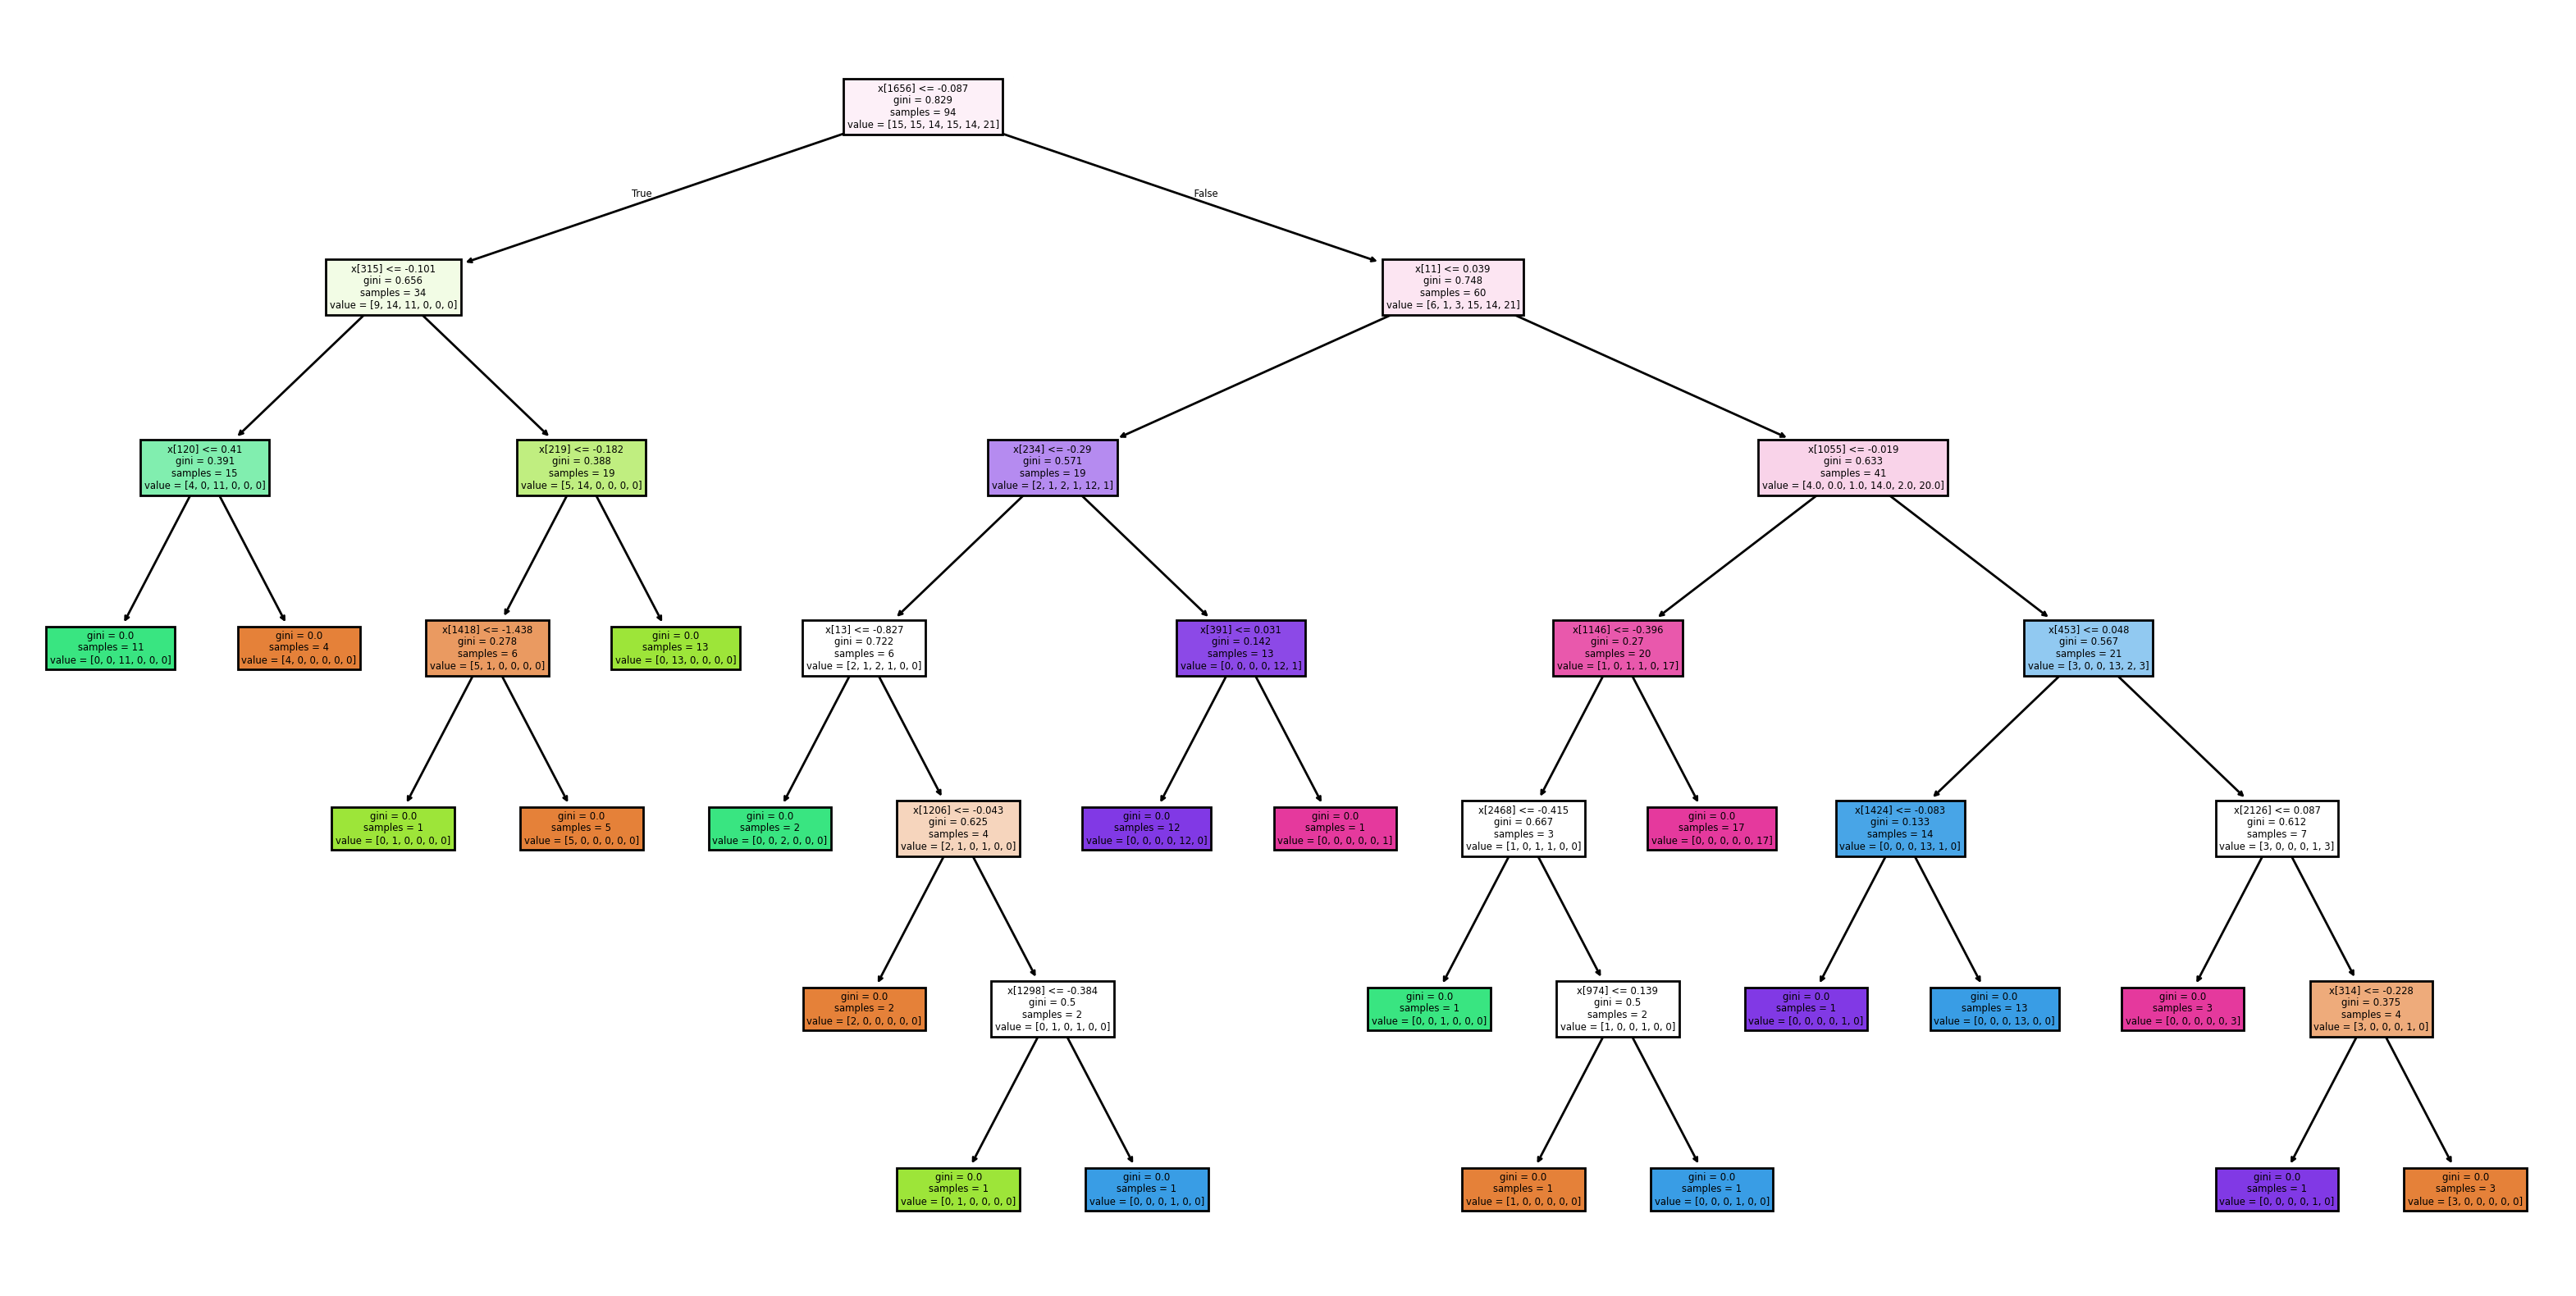

In [105]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt3_g, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  63.41463414634146%
Precision :  63.23232323232323%
Recall :  61.64021164021164%


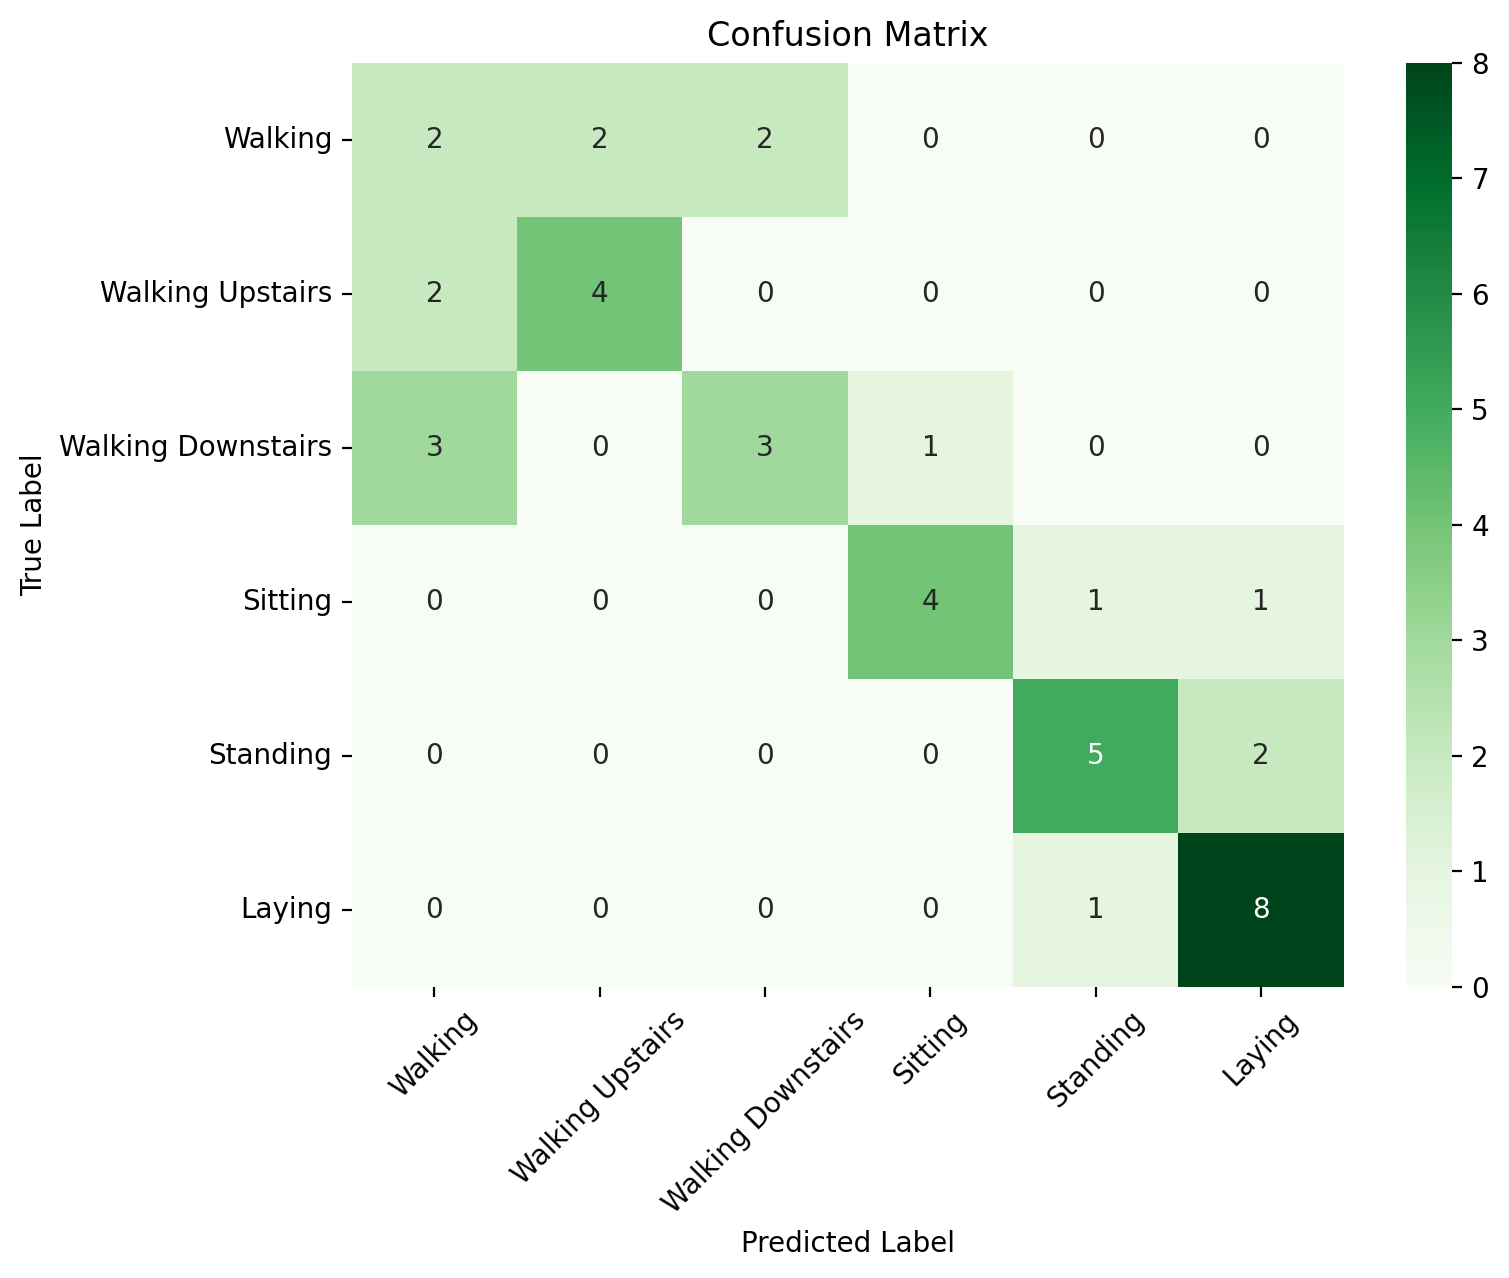

In [129]:

y_hat=sk_dt3_g.predict(xt_n)
a=skl.metrics.accuracy_score(Body_y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(Body_y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(Body_y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(Body_y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Using Entropy

 Making Decision Tree

In [107]:
sk_dt_e3=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt3_e=sk_dt_e3.fit(x_n,y_n)
depth=sk_dt3_e.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 6


Decision Tree Plot

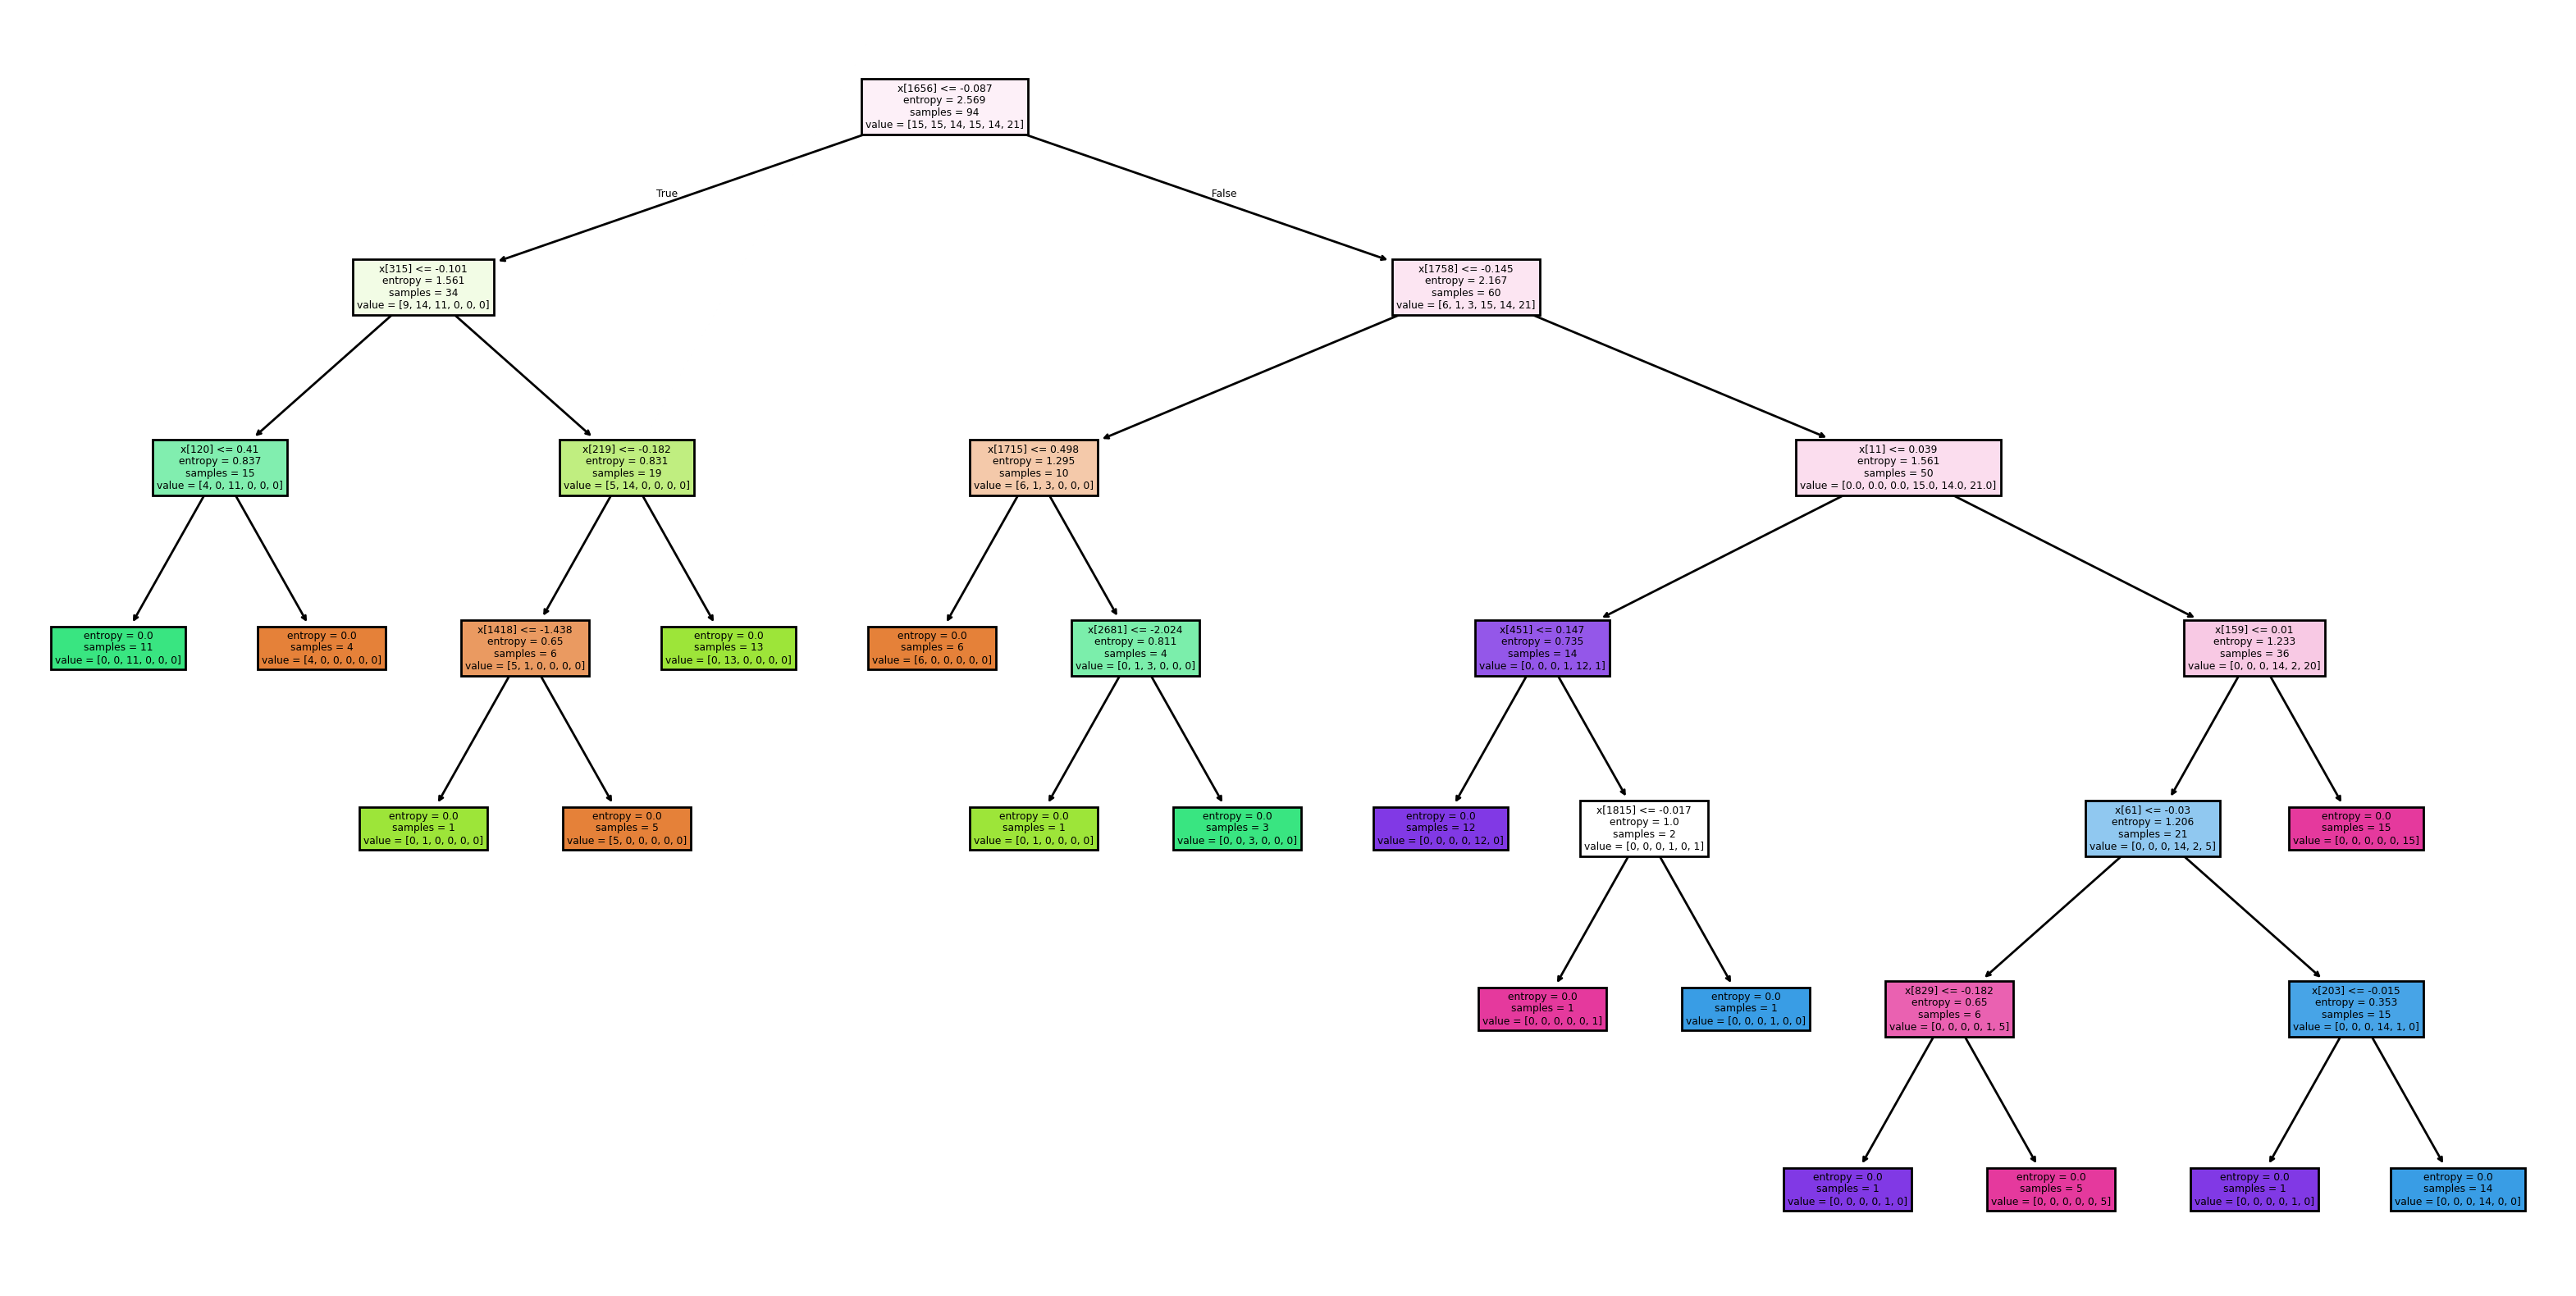

In [108]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt3_e, filled=True)
plt.show()

Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  58.536585365853654%
Precision :  59.8015873015873%
Recall :  57.53968253968254%


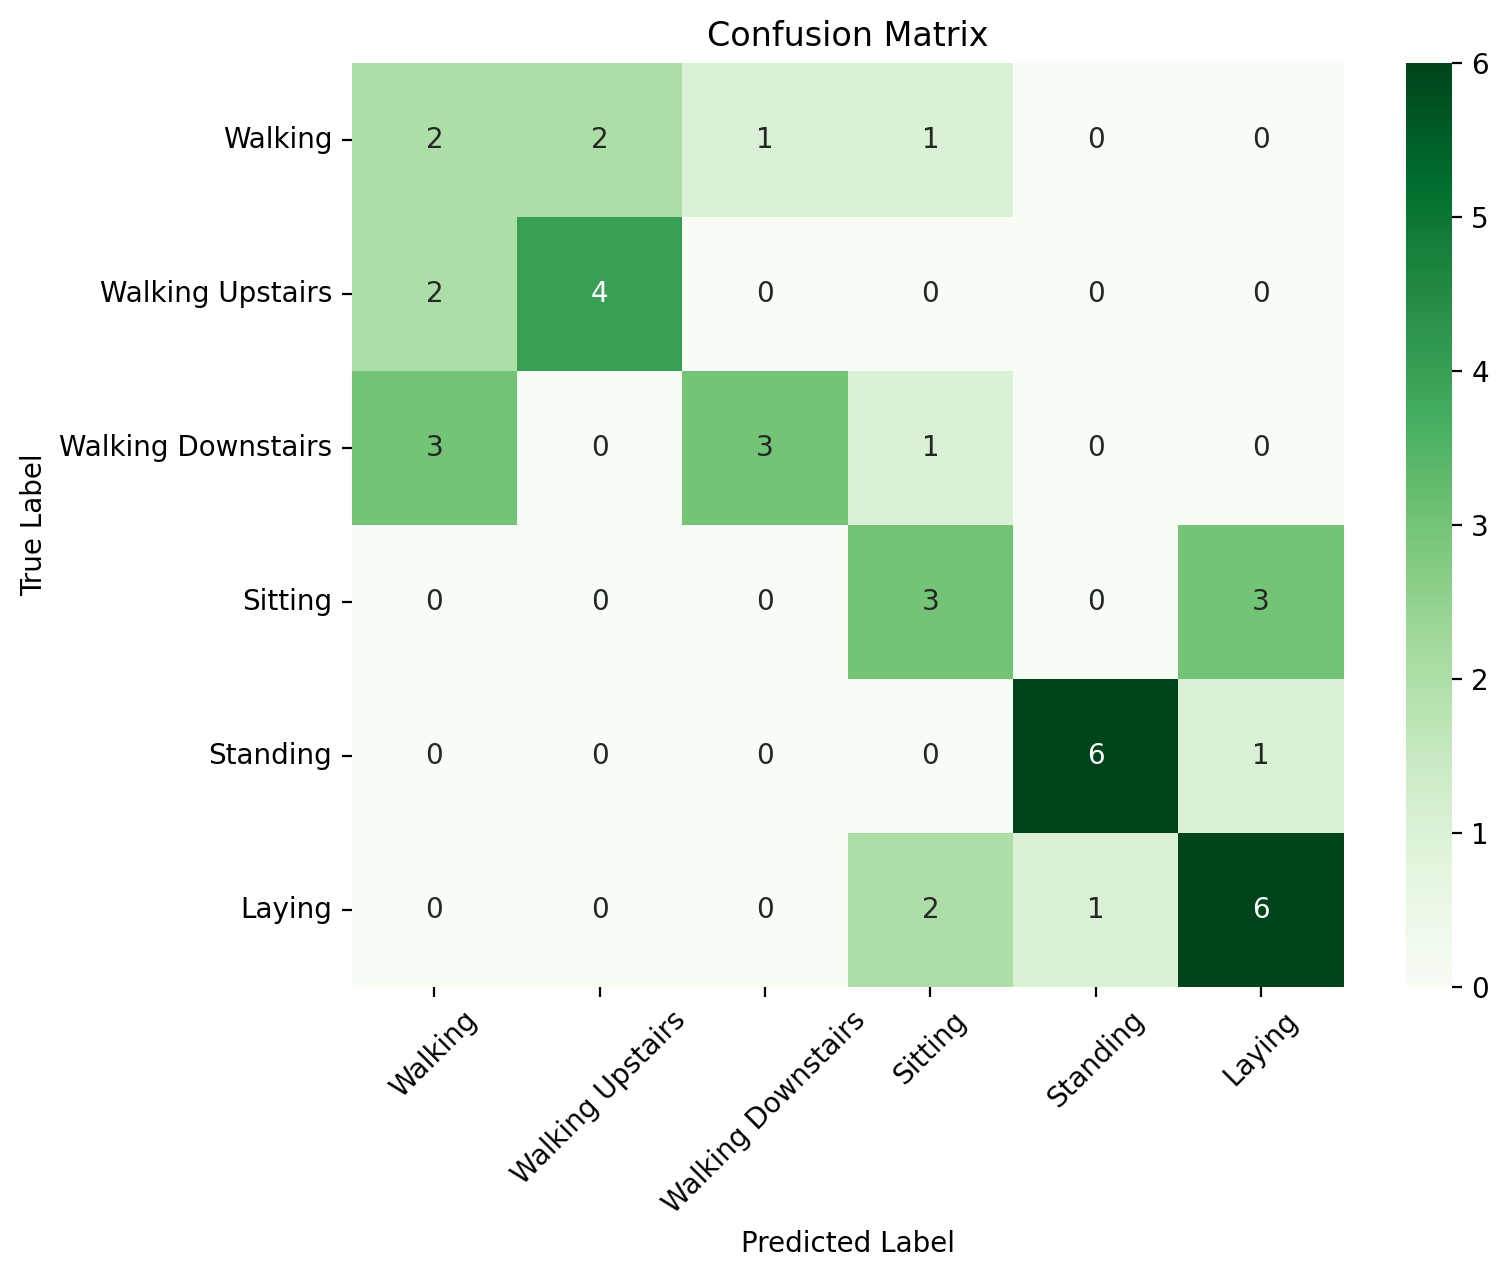

In [130]:

y_hat=sk_dt3_e.predict(xt_n)
a=skl.metrics.accuracy_score(Body_y_test,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(Body_y_test,y_hat,average='macro')
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(Body_y_test,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(Body_y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Compare the results of the three models. Which model do you think is better?

The best model is one with 561 features using gini index with accuracy of 85.9%

The decision trees with higher number of features are performing much better as compared to the those with lesser number of features.Reason being that higher number of features helps the model to differentiate between activities clearer.

The best model formance is given by the models made using the 561 extra features and 40 TSFEL features with accuracies more than 80% for bith of them. The model made by the raw data and extra inertial signals features works at a not so good accuracy of abt 50-60%.

## 2.Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. 

### For Decision Tree 1

#### With gini criterion

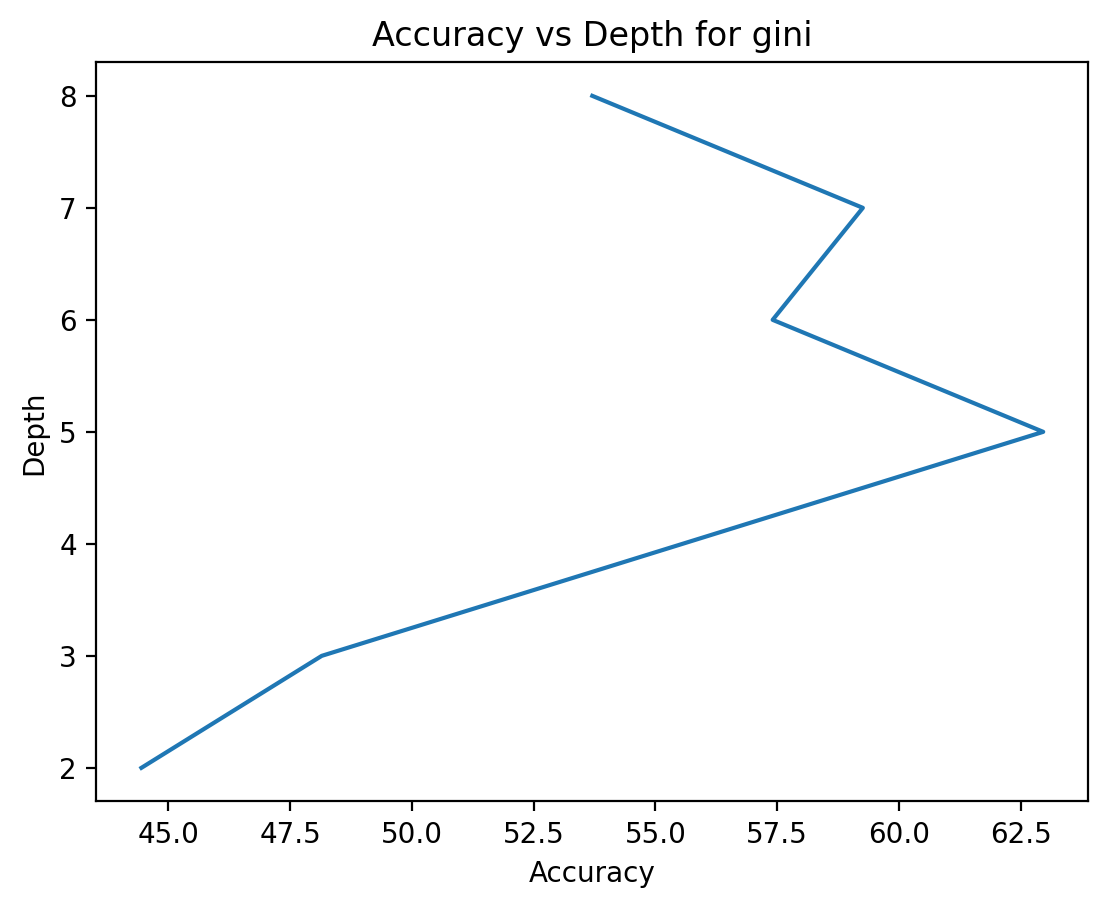

In [133]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc=acc*100
    accuracy_list.append(acc)

plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


#### With entropy criterion

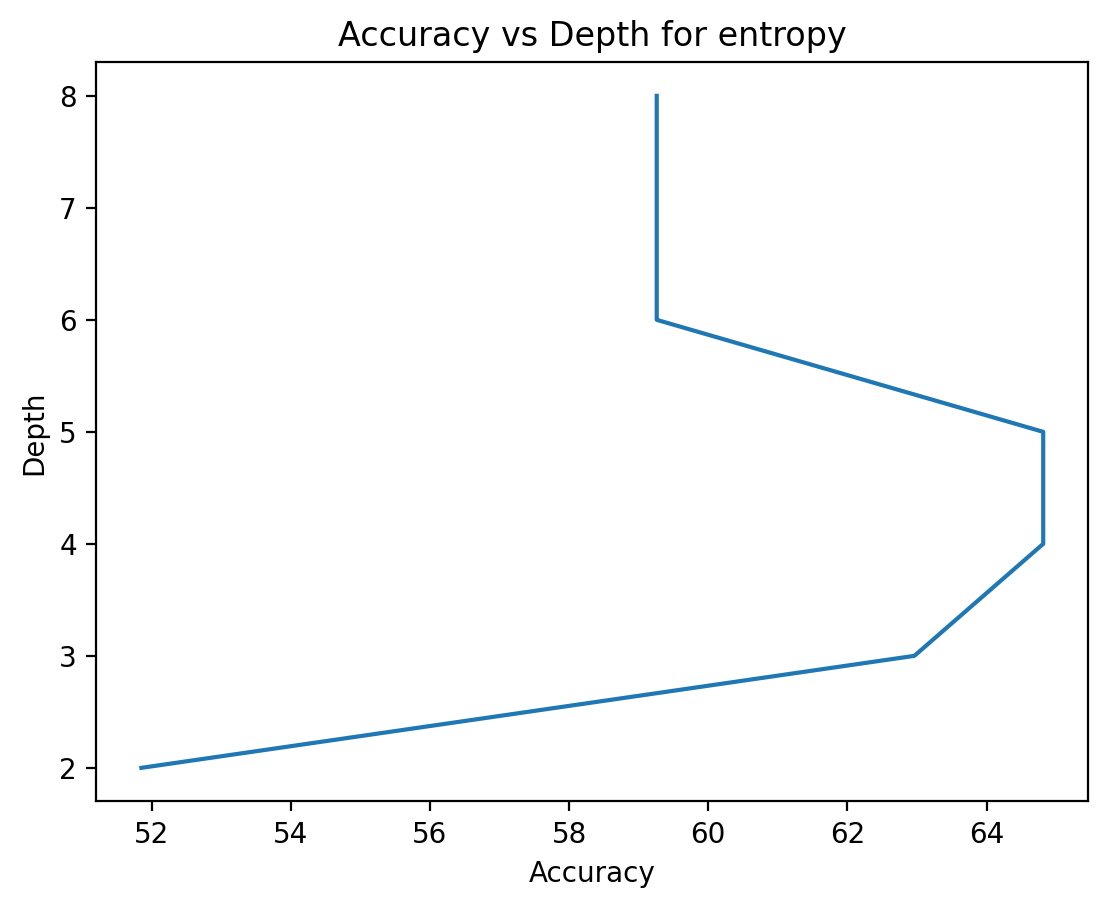

In [134]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc=acc*100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


### For Decision Tree 2

#### Using PCA of TSFEL Features

##### With gini criterion

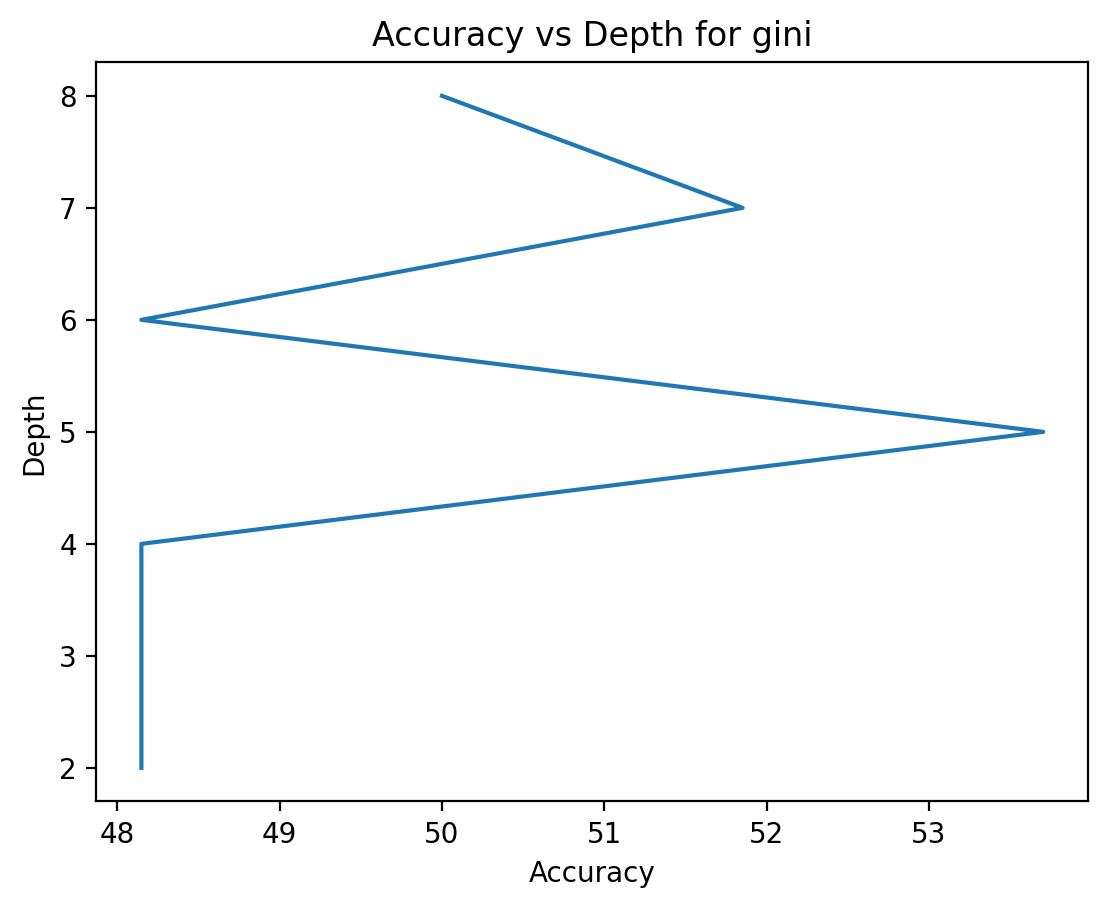

In [135]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_pca,y_pca)
    y_hat1=skl_dt.predict(xt_pca)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc=acc*100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


##### With entropy criterion

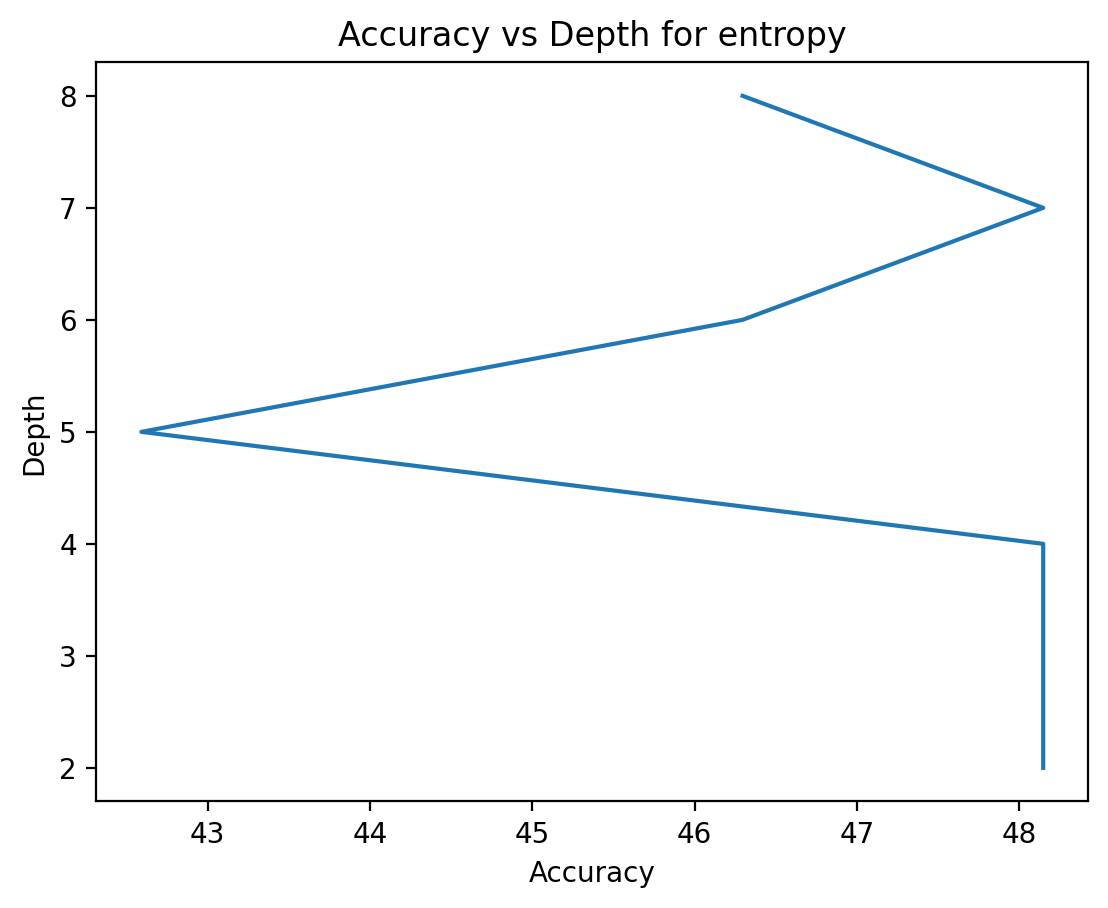

In [136]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_pca,y_pca)
    y_hat1=skl_dt.predict(xt_pca)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc=acc*100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


#### Using the 40 best TSEFEL Features

##### With gini criterion

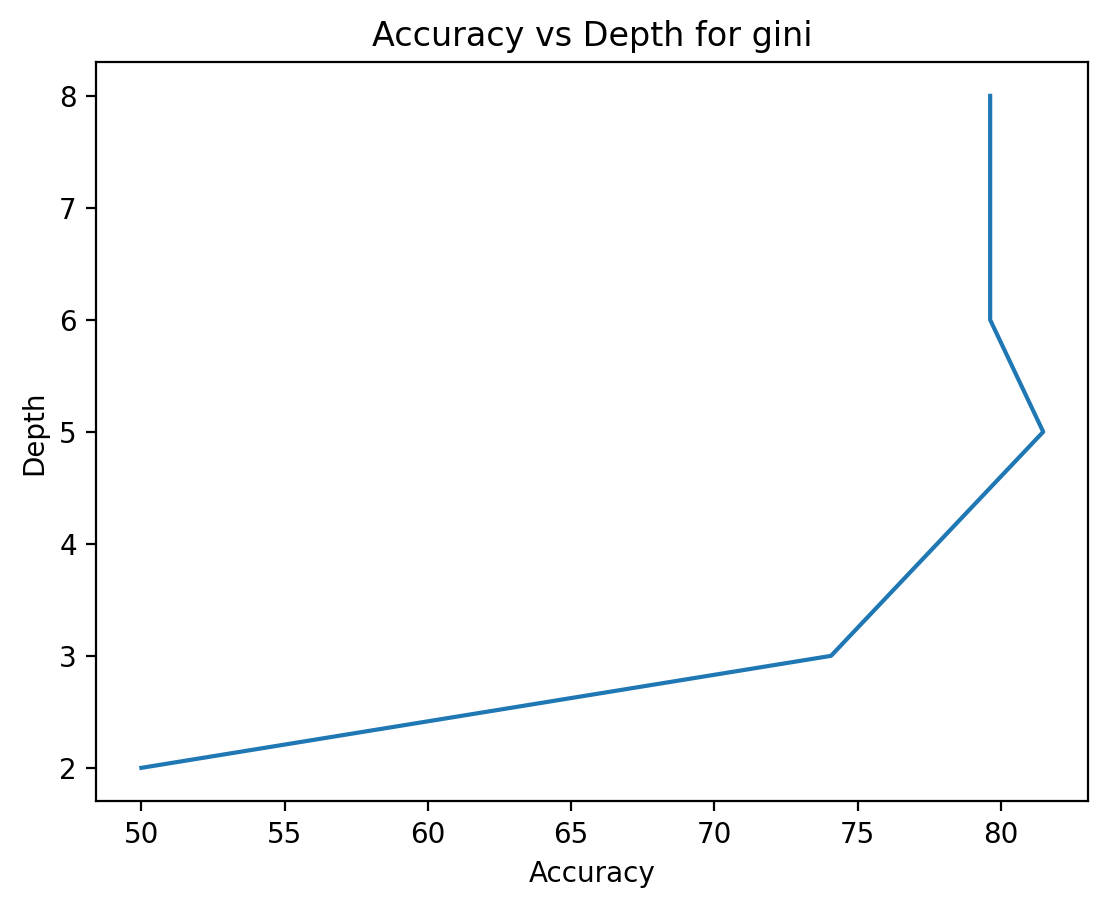

In [137]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x2,y_train)
    y_hat1=skl_dt.predict(xt2)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


##### With entropy criterion

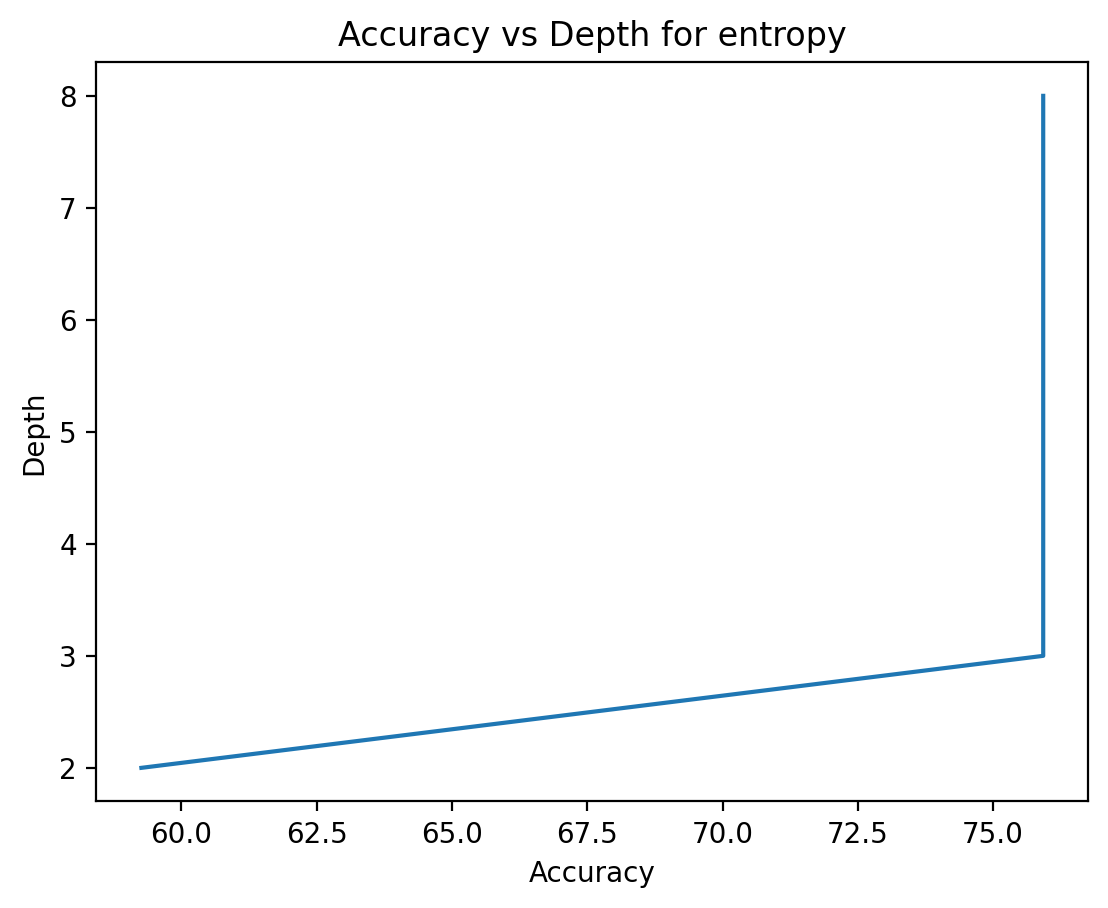

In [138]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x2,y_train)
    y_hat1=skl_dt.predict(xt2)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


### For Decision Tree 3

#### Using 561 other features

##### With gini criterion

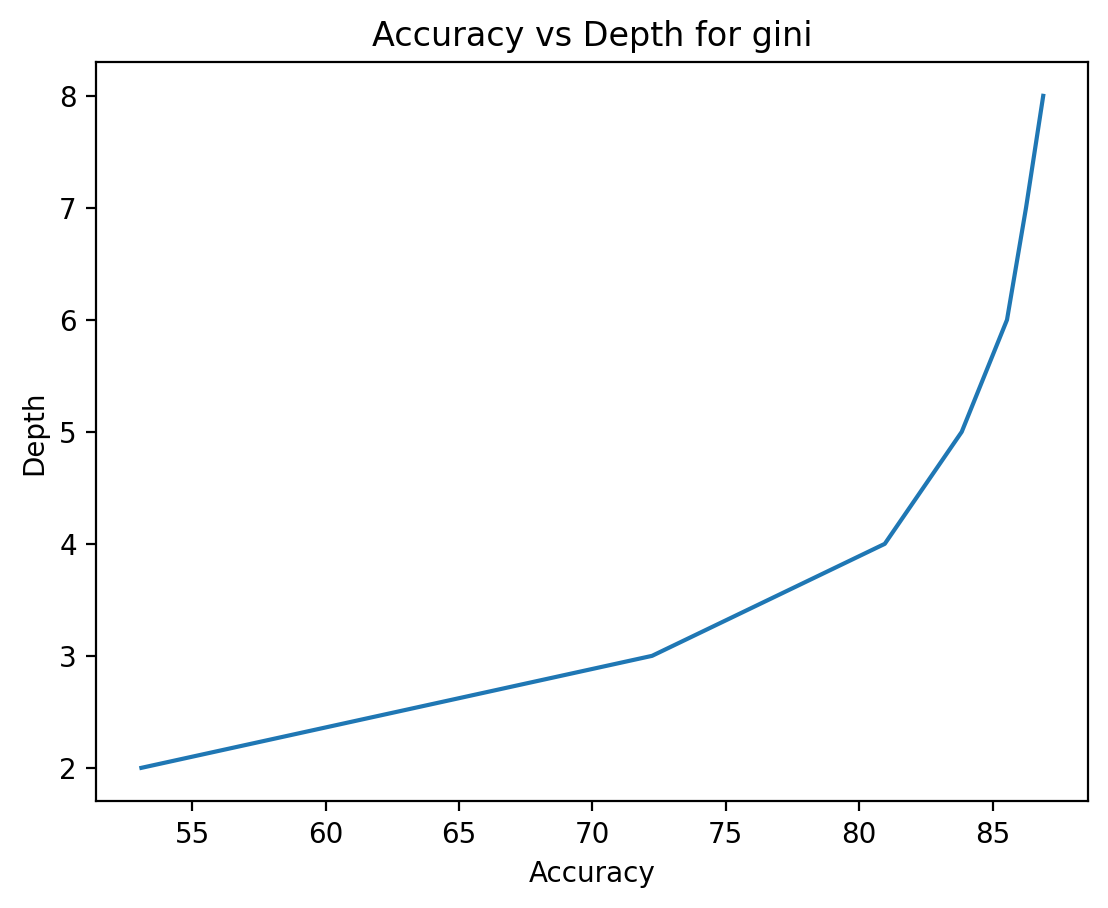

In [139]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(of_x,of_y)
    y_hat1=skl_dt.predict(of_xt)
    acc=skl.metrics.accuracy_score(yt,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


##### With entropy criterion

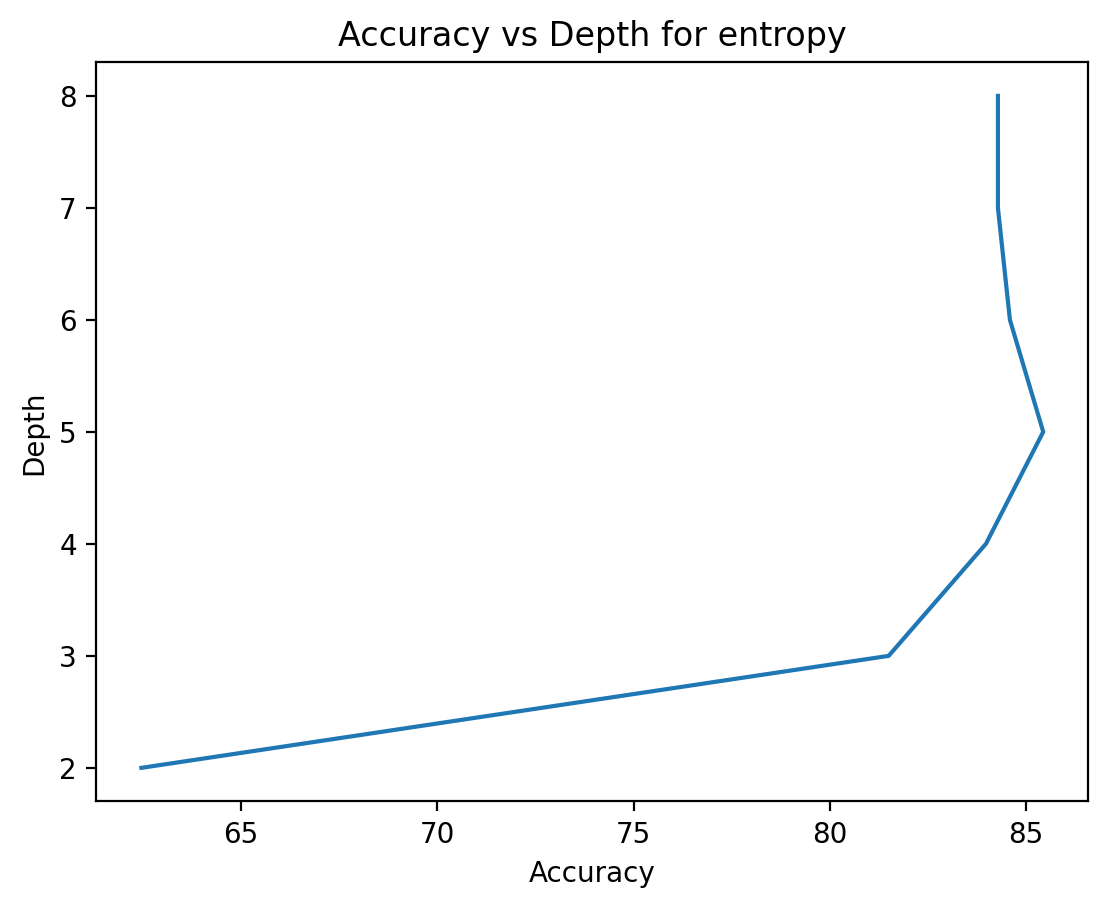

In [140]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(of_x,of_y)
    y_hat1=skl_dt.predict(of_xt)
    acc=skl.metrics.accuracy_score(yt,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


#### Using the extra features given in inertial signals (body_acc and body_gyro)

##### With gini criterion

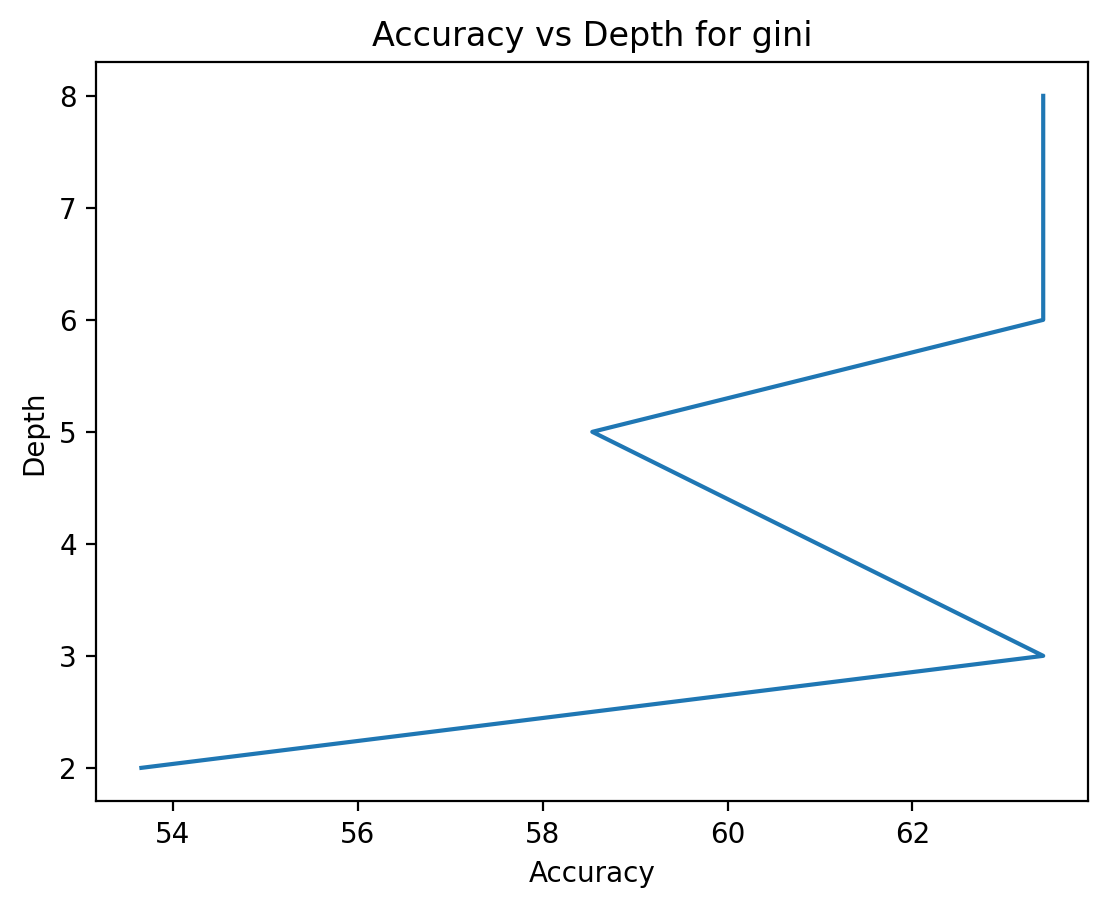

In [141]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_n,y_n)
    y_hat1=skl_dt.predict(xt_n)
    acc=skl.metrics.accuracy_score(Body_y_test,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


##### With entropy criterion

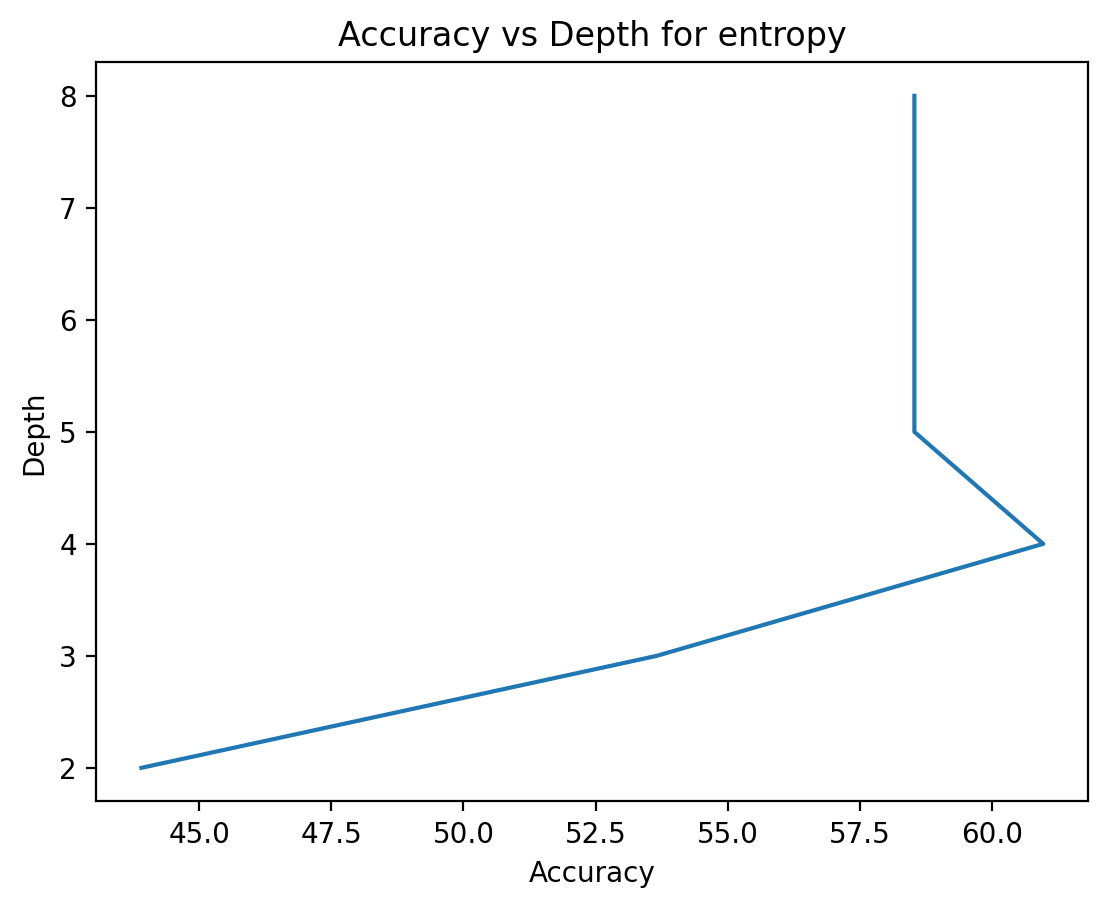

In [142]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_n,y_n)
    y_hat1=skl_dt.predict(xt_n)
    acc=skl.metrics.accuracy_score(Body_y_test,y_hat1)
    acc*=100
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


## 3.Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

The models performance is bad for dyanamic activities the potential reasons for that are:
1. **Similar movement patterns**: The movement patterns of Walking , Walking Downwards and Walking Upwards are very similar with minor differences in y-axis accelerations. So, the model might not be able to clearly differentiate between these activities and confuse between them.
2. **Feature Overlap**: The Features acceleration in X and Z  would be almost same for all the walking which might confuse the model as 2 of 3 Features used are very similar.
3. **Sensor Placements and Orientation Differences**: The sensor might be kept at different height or position and orientations while recording this data which might confuse the model.
4. **Variability in people** : the walking style and the height of people might be different which create a difference in the data and which might lead the model to misclassify some of them.
5. **Incline Gradient** : The Incline Gradient i.e. decrease or increase of the slope per step where the data is collected might not be very significant due to which the difference in the data points might not be very significant.